# **FGV EESP**

- ## Séries Temporais de Dados Econômicos - Brasil
---



### **Bibliotecas**

In [ ]:
# Testes de raiz unitária
install.packages("urca")

# Painéis com gráficos
install.packages("gridExtra")

# Modelo VAR
install.packages("vars")

# Modelo VECM
install.packages("tsDyn")

In [ ]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(httr)
library(lubridate)
library(readxl)
library(tsDyn)
library(urca)
library(vars)
library(tidyverse)
library(zoo)

### **Dados**

In [3]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/inflation-expectation/raw/main/data/public_data.xlsx"

# Download do arquivo
download.file(file_path, "public_data.xlsx")

# Ler o arquivo Excel e converter em dataframe
df_public_data <- as.data.frame(read_excel("public_data.xlsx"))

# Converter year e month_name
df_public_data <- df_public_data %>%
  mutate(year = as.numeric(year),  # Converter year para numérico
         month_name = factor(month_name, levels = month.abb, ordered = TRUE))  # Converter month_name para um fator ordenado

# Converter month_date
df_public_data$month_date <- ymd(df_public_data$month_date)  # Converter month_date para formato Date

# Lista de variáveis que você deseja transformar em séries temporais
vars_to_convert <- c("month", "market_inflation_expectation", "consumer_inflation_expectation", "ipca", "selic", "ibc_br", "gov_debt", "household_debt", "household_income", "pib", "usd_brl", "ipca_lag", "selic_lag")

# Loop para transformar as variáveis em séries temporais
for (var in vars_to_convert) {
  df_public_data[[var]] <- ts(df_public_data[[var]], start = c(2006, 1), frequency = 12)
}

### **Análise de Estacionariedade**

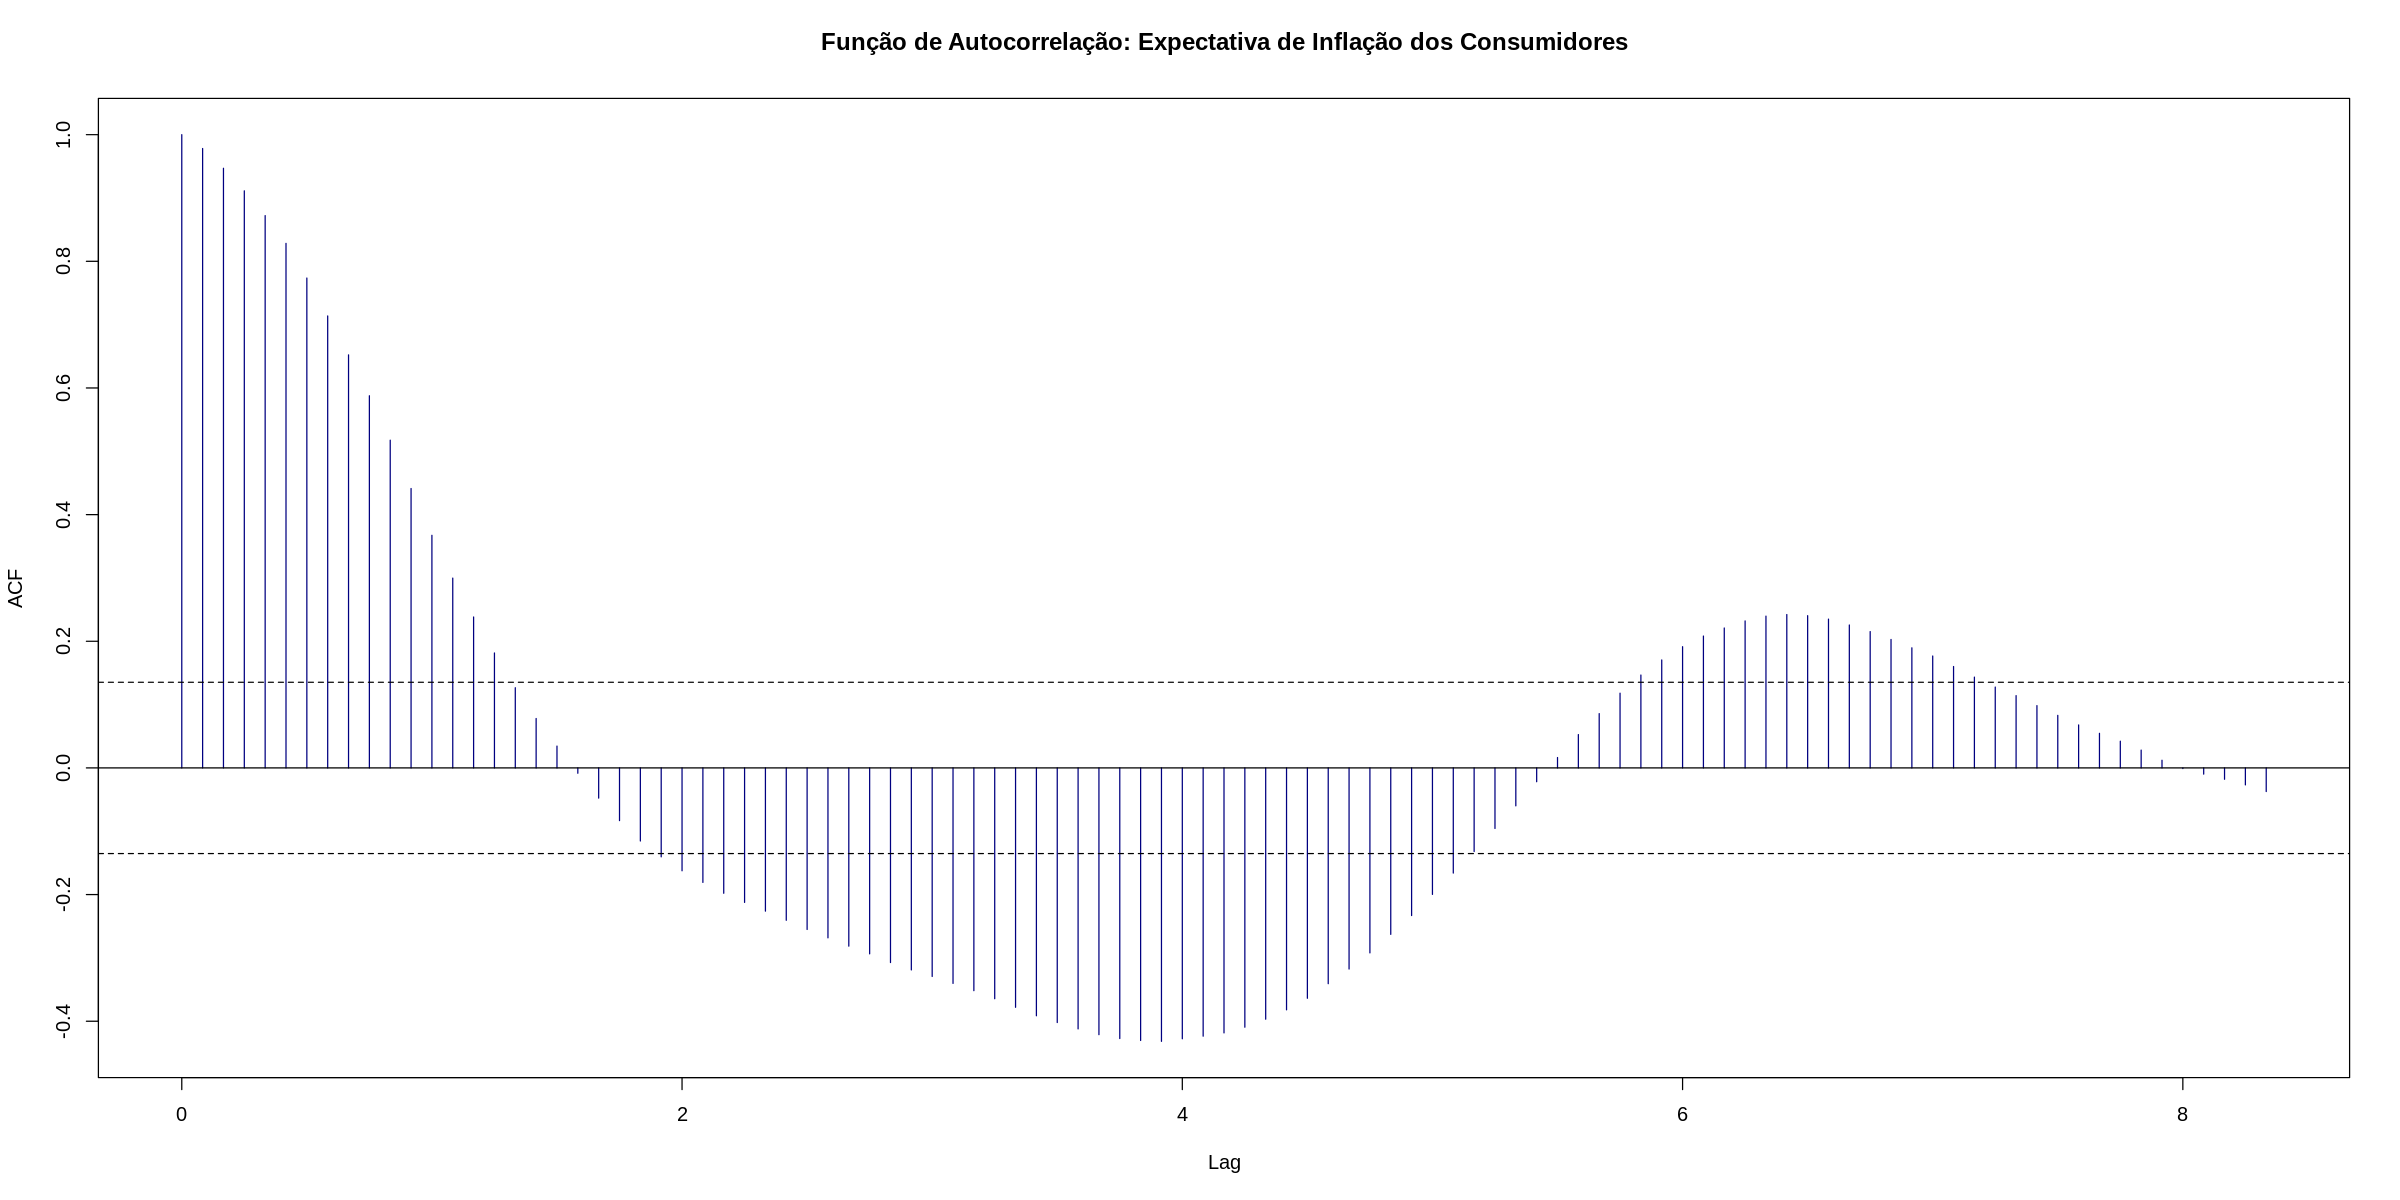

In [4]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação
acf(df_public_data$consumer_inflation_expectation,
    main = "Função de Autocorrelação: Expectativa de Inflação dos Consumidores",
    col = "navy",
    ci.col = "black",
    lag.max = 100)

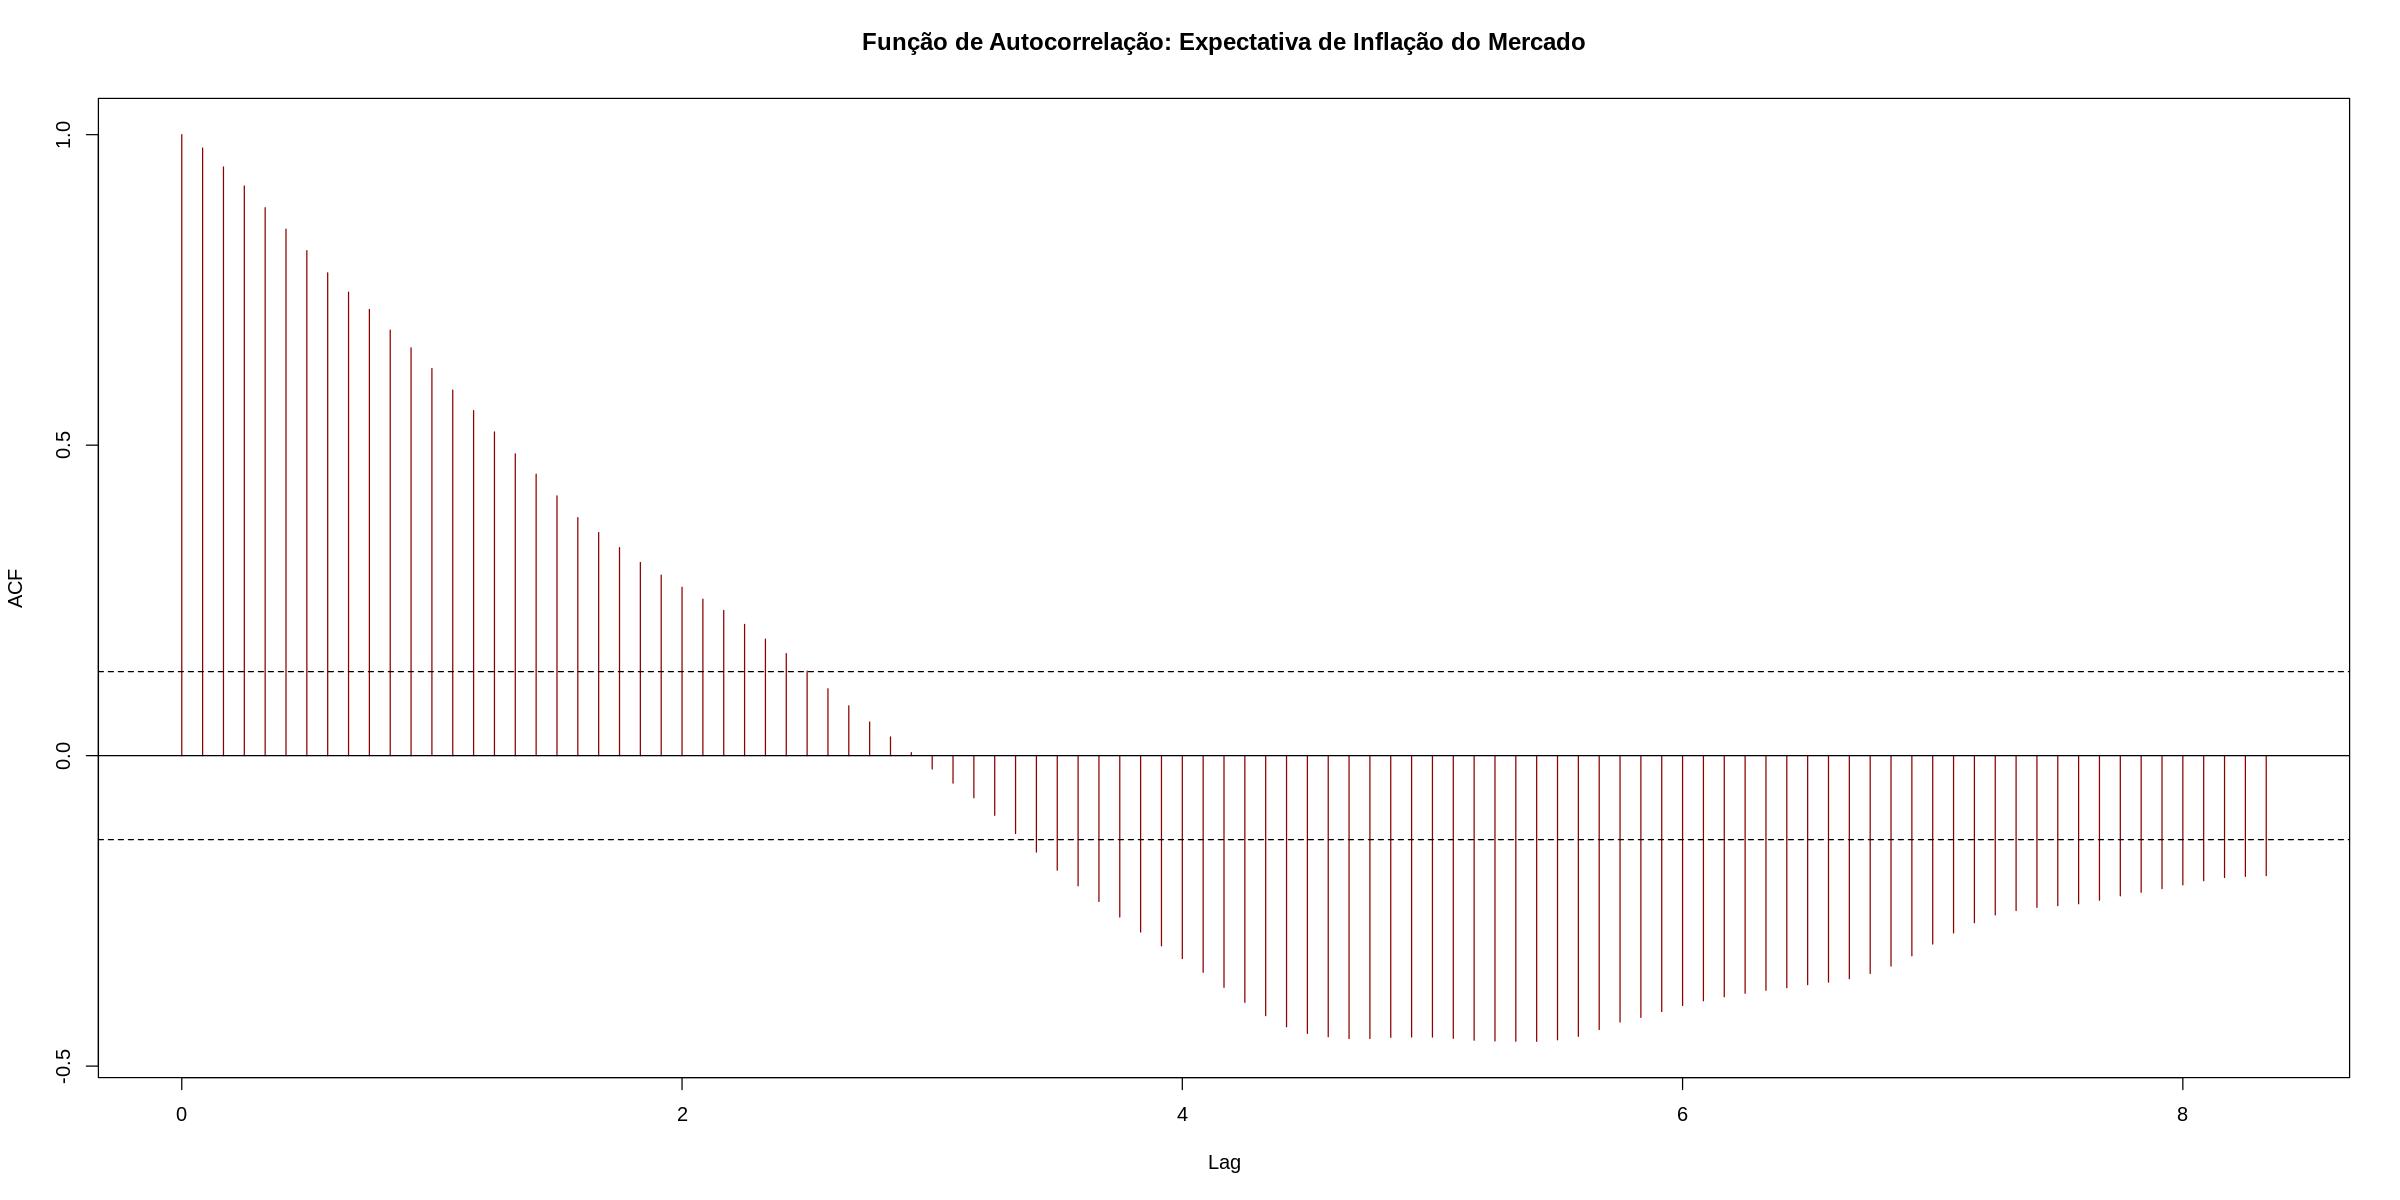

In [5]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação
acf(df_public_data$market_inflation_expectation,
    main = "Função de Autocorrelação: Expectativa de Inflação do Mercado",
    col = "darkred",
    ci.col = "black",
    lag.max = 100)

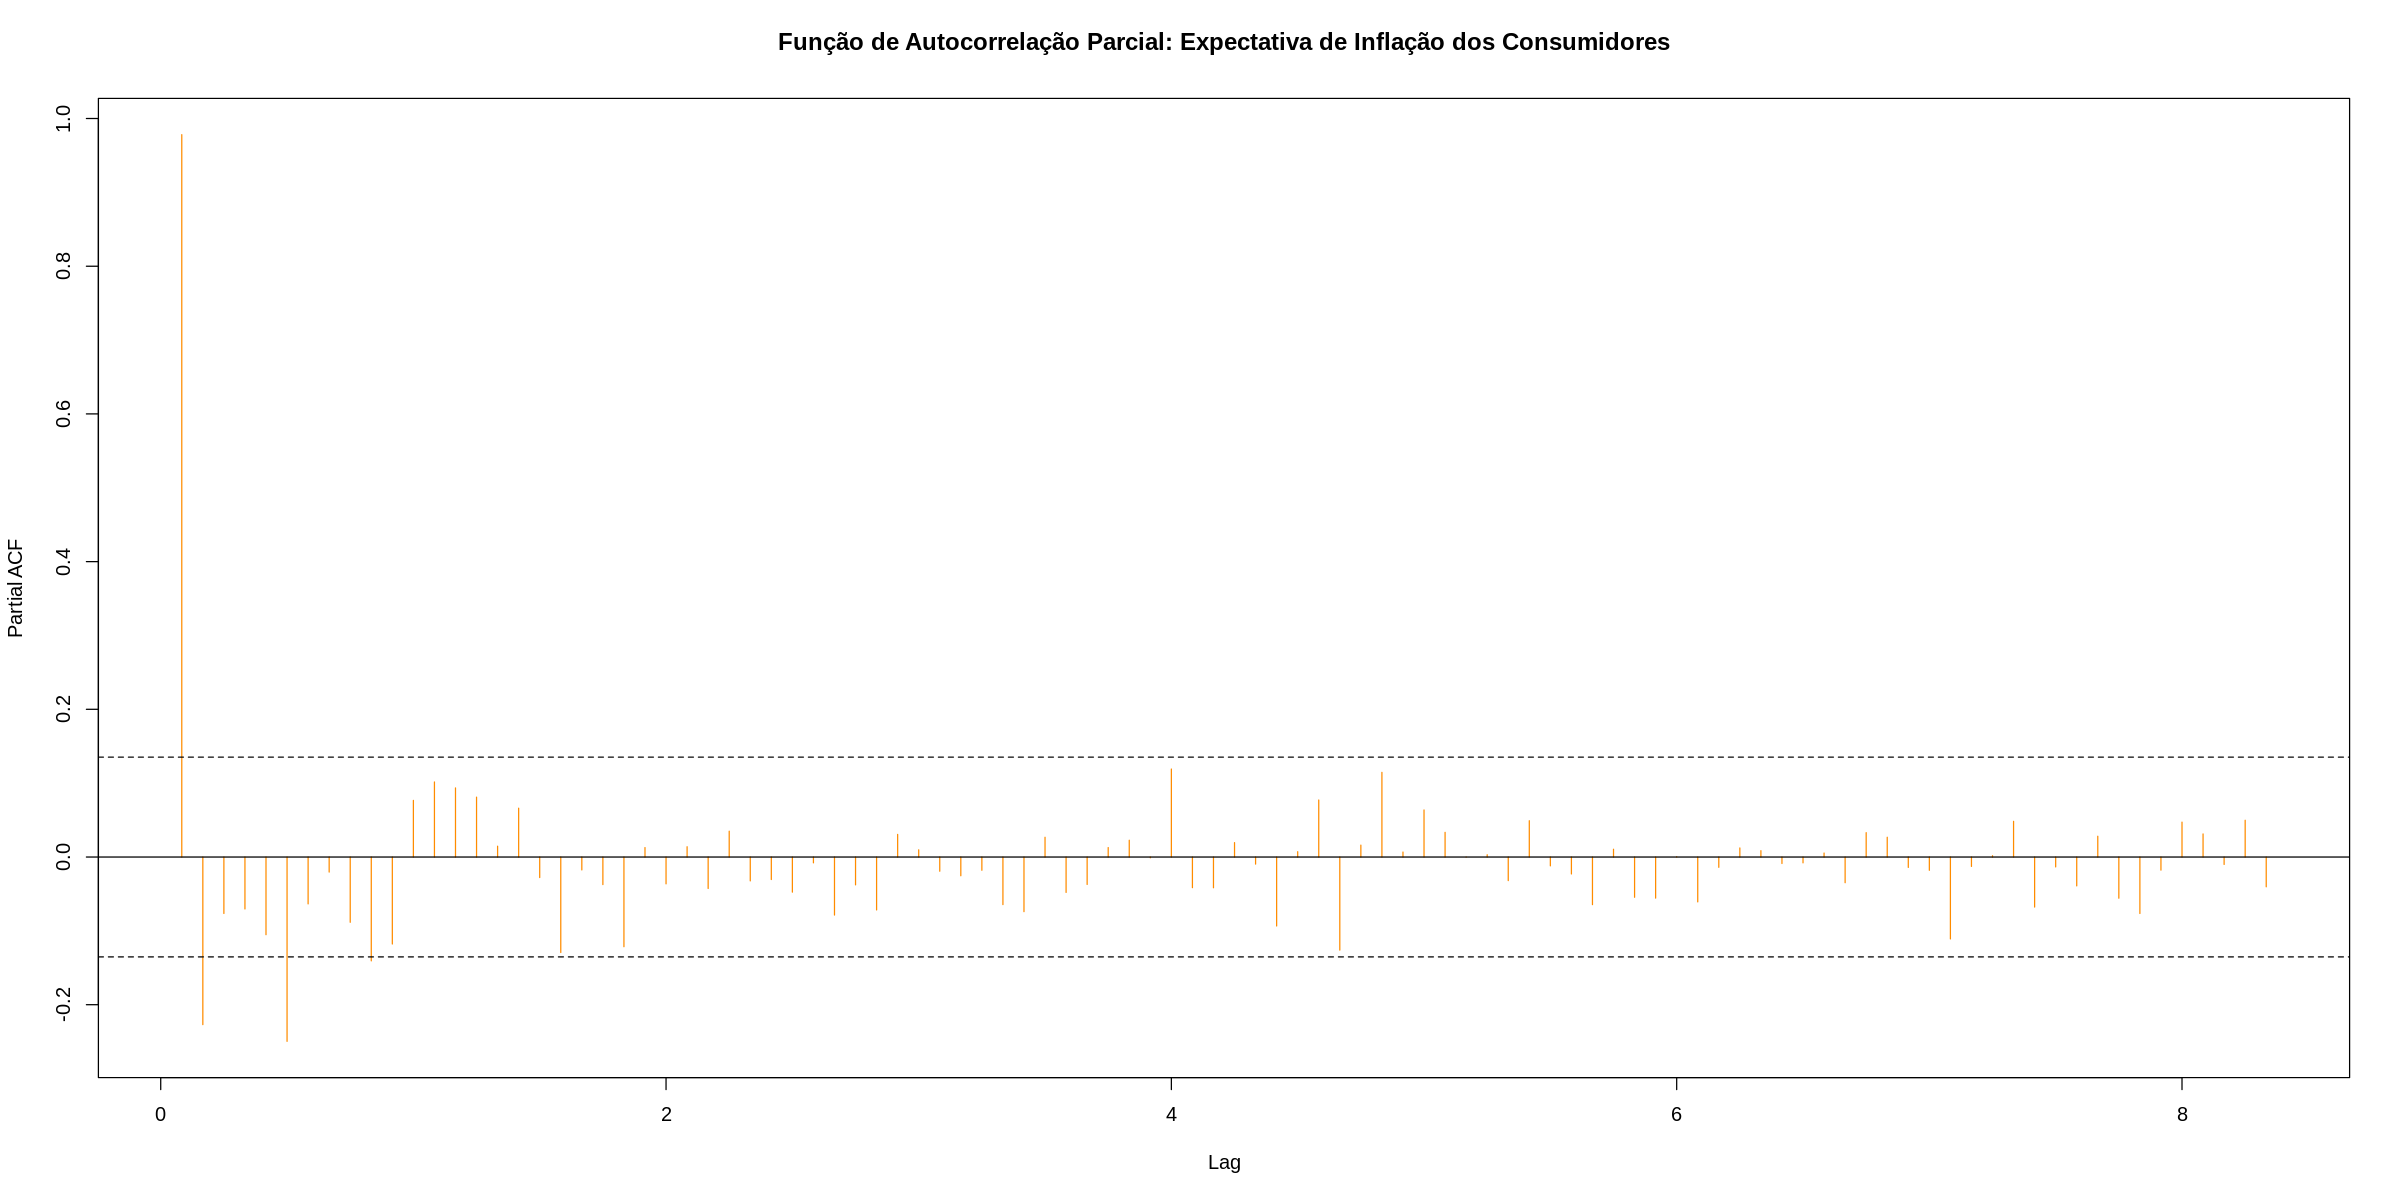

In [6]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação Parcial
pacf(df_public_data$consumer_inflation_expectation,
    main = "Função de Autocorrelação Parcial: Expectativa de Inflação dos Consumidores",
    col = "darkorange",
    ci.col = "black",
    lag.max = 100)

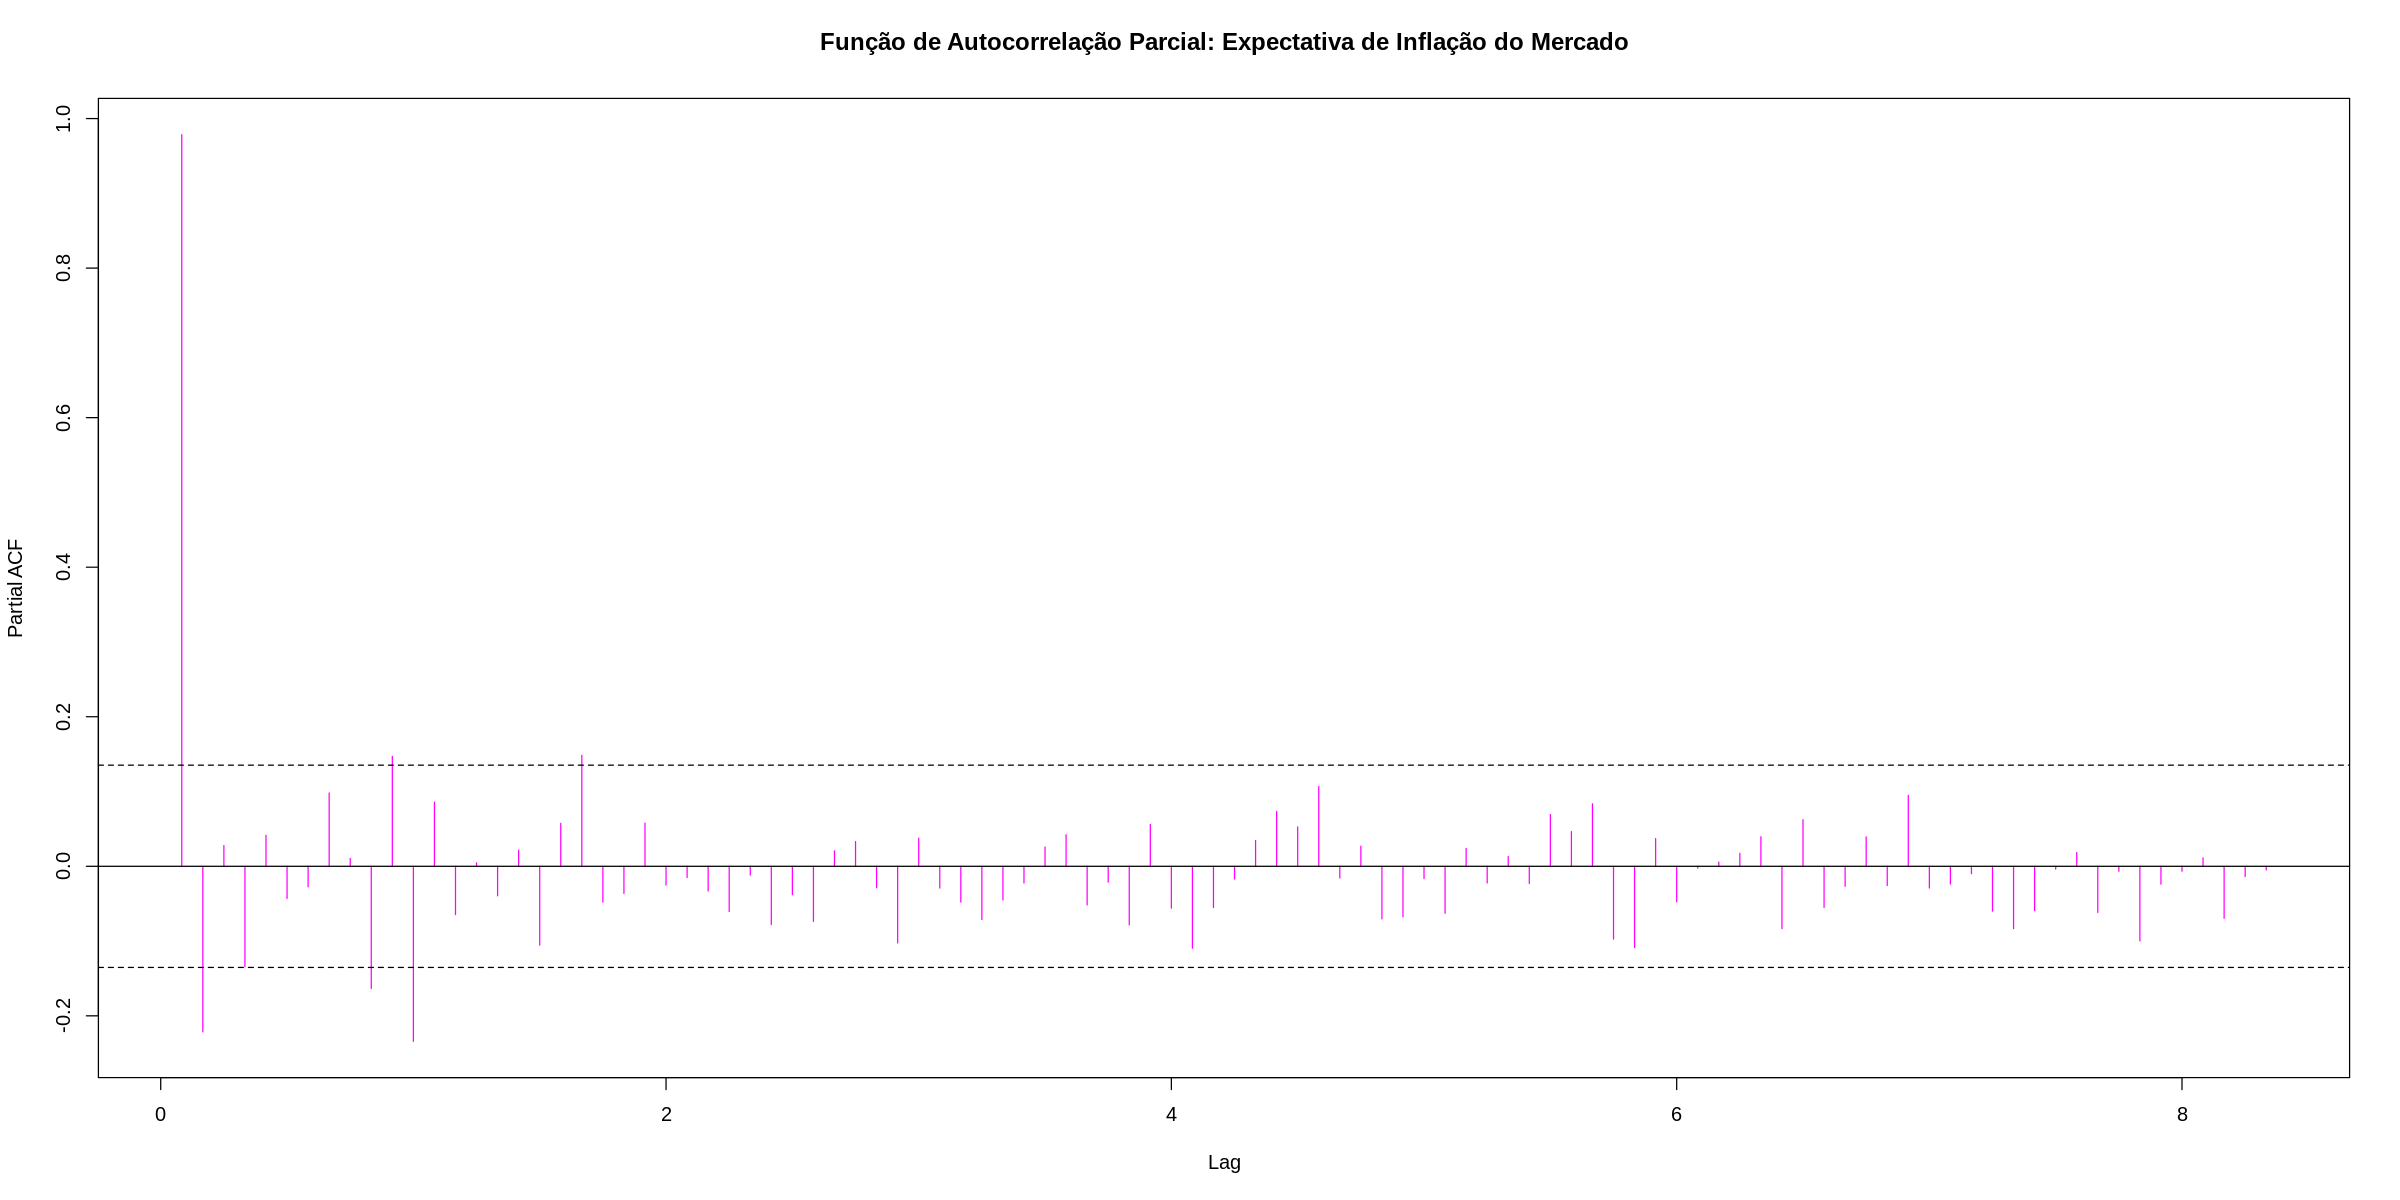

In [7]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação Parcial
pacf(df_public_data$market_inflation_expectation,
    main = "Função de Autocorrelação Parcial: Expectativa de Inflação do Mercado",
    col = "magenta",
    ci.col = "black",
    lag.max = 100)

#### ADF (Augmented-Dickey-Fuller)

- $H_0$: possui raiz unitária

  * _tau3_: hipótese nula (raiz unitária)
  * _phi2_: hipótese nula (raiz unitária, sem tendência e sem drift)
  * _phi3_: hipótese nula (raiz unitária e sem tendência)

In [8]:
### Consumer Inflation Expectation
summary( ur.df( df_public_data$consumer_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09677 -0.18560 -0.00357  0.16660  0.94785 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.3515298  0.1292630   2.719  0.00717 **
z.lag.1      -0.0534263  0.0184523  -2.895  0.00425 **
tt            0.0002051  0.0004114   0.499  0.61869   
z.diff.lag1   0.1955855  0.0717856   2.725  0.00707 **
z.diff.lag2   0.0156361  0.0723755   0.216  0.82920   
z.diff.lag3   0.1000963  0.0732853   1.366  0.17367   
z.diff.lag4  -0.0227473  0.0732961  -0.310  0.75665   
z.diff.lag5   0.2425796  0.0732023   3.314  0.00111 **
z.diff.lag6   0.0650533  0.0745469   0.873  0.38400   
z.diff.lag7   0.0350018  0.0735912   0.476  0.63491   
z.diff.lag8   0.0362034  0.0732818   0.494 

**Resultado**

- Como, em módulo, os valores de test-statistic são **menores** que tau3, phi2 e phi3, **não se rejeita** as hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **possui raiz unitária**, o que significa que é **não-estacionária**.

In [9]:
### Market Inflation Expectation
summary( ur.df( df_public_data$market_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68051 -0.09494  0.00893  0.10353  0.48780 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.1837407  0.0787683   2.333 0.020759 *  
z.lag.1      -0.0327461  0.0146501  -2.235 0.026619 *  
tt           -0.0002223  0.0002215  -1.004 0.316769    
z.diff.lag1   0.3703207  0.0731423   5.063 1.01e-06 ***
z.diff.lag2  -0.1145100  0.0775160  -1.477 0.141338    
z.diff.lag3   0.1836545  0.0754112   2.435 0.015841 *  
z.diff.lag4   0.0066769  0.0751151   0.089 0.929268    
z.diff.lag5   0.0026789  0.0743106   0.036 0.971281    
z.diff.lag6   0.0230546  0.0739968   0.312 0.755730    
z.diff.lag7  -0.0878857  0.0739289  -1.189 0.236072    
z.diff.lag8  -0.0963651  0.07425

**Resultado**

- Como, em módulo, os valores de test-statistic são **menores** que tau3, phi2 e phi3, **não se rejeita** as hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **possui raiz unitária**, o que significa que é **não-estacionária**.

#### KPSS

- $H_0$: não possui raiz unitária

In [10]:
### Consumer Inflation Expectation
summary( ur.kpss( df_public_data$consumer_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.2148 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é maior que o valor crítico, rejeita-se a hipótese nula para um nível de significância de 10%, ou seja, a série possui raiz unitária, o que significa que é não-estacionária.

In [11]:
### Market Inflation Expectation
summary( ur.kpss( df_public_data$market_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.5528 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é **maior** que o valor crítico, **rejeita-se** a hipótese nula para um nível de significância de 10%, ou seja, a série **possui raiz unitária**, o que significa que é **não-estacionária**.

### **Induzir Estacionariedade**

In [12]:
diff_consumer_inflation_expectation = diff( df_public_data$consumer_inflation_expectation )
diff_market_inflation_expectation = diff( df_public_data$market_inflation_expectation )
diff_ipca = diff( df_public_data$ipca )
diff_ipca_lag = diff( df_public_data$ipca_lag )
diff_selic = diff( df_public_data$selic )
diff_selic_lag = diff( df_public_data$selic_lag )

df_public_data_diff <- data.frame( month = time( diff_consumer_inflation_expectation ), diff_consumer_inflation_expectation, diff_market_inflation_expectation, diff_ipca, diff_ipca_lag, diff_selic, diff_selic_lag)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


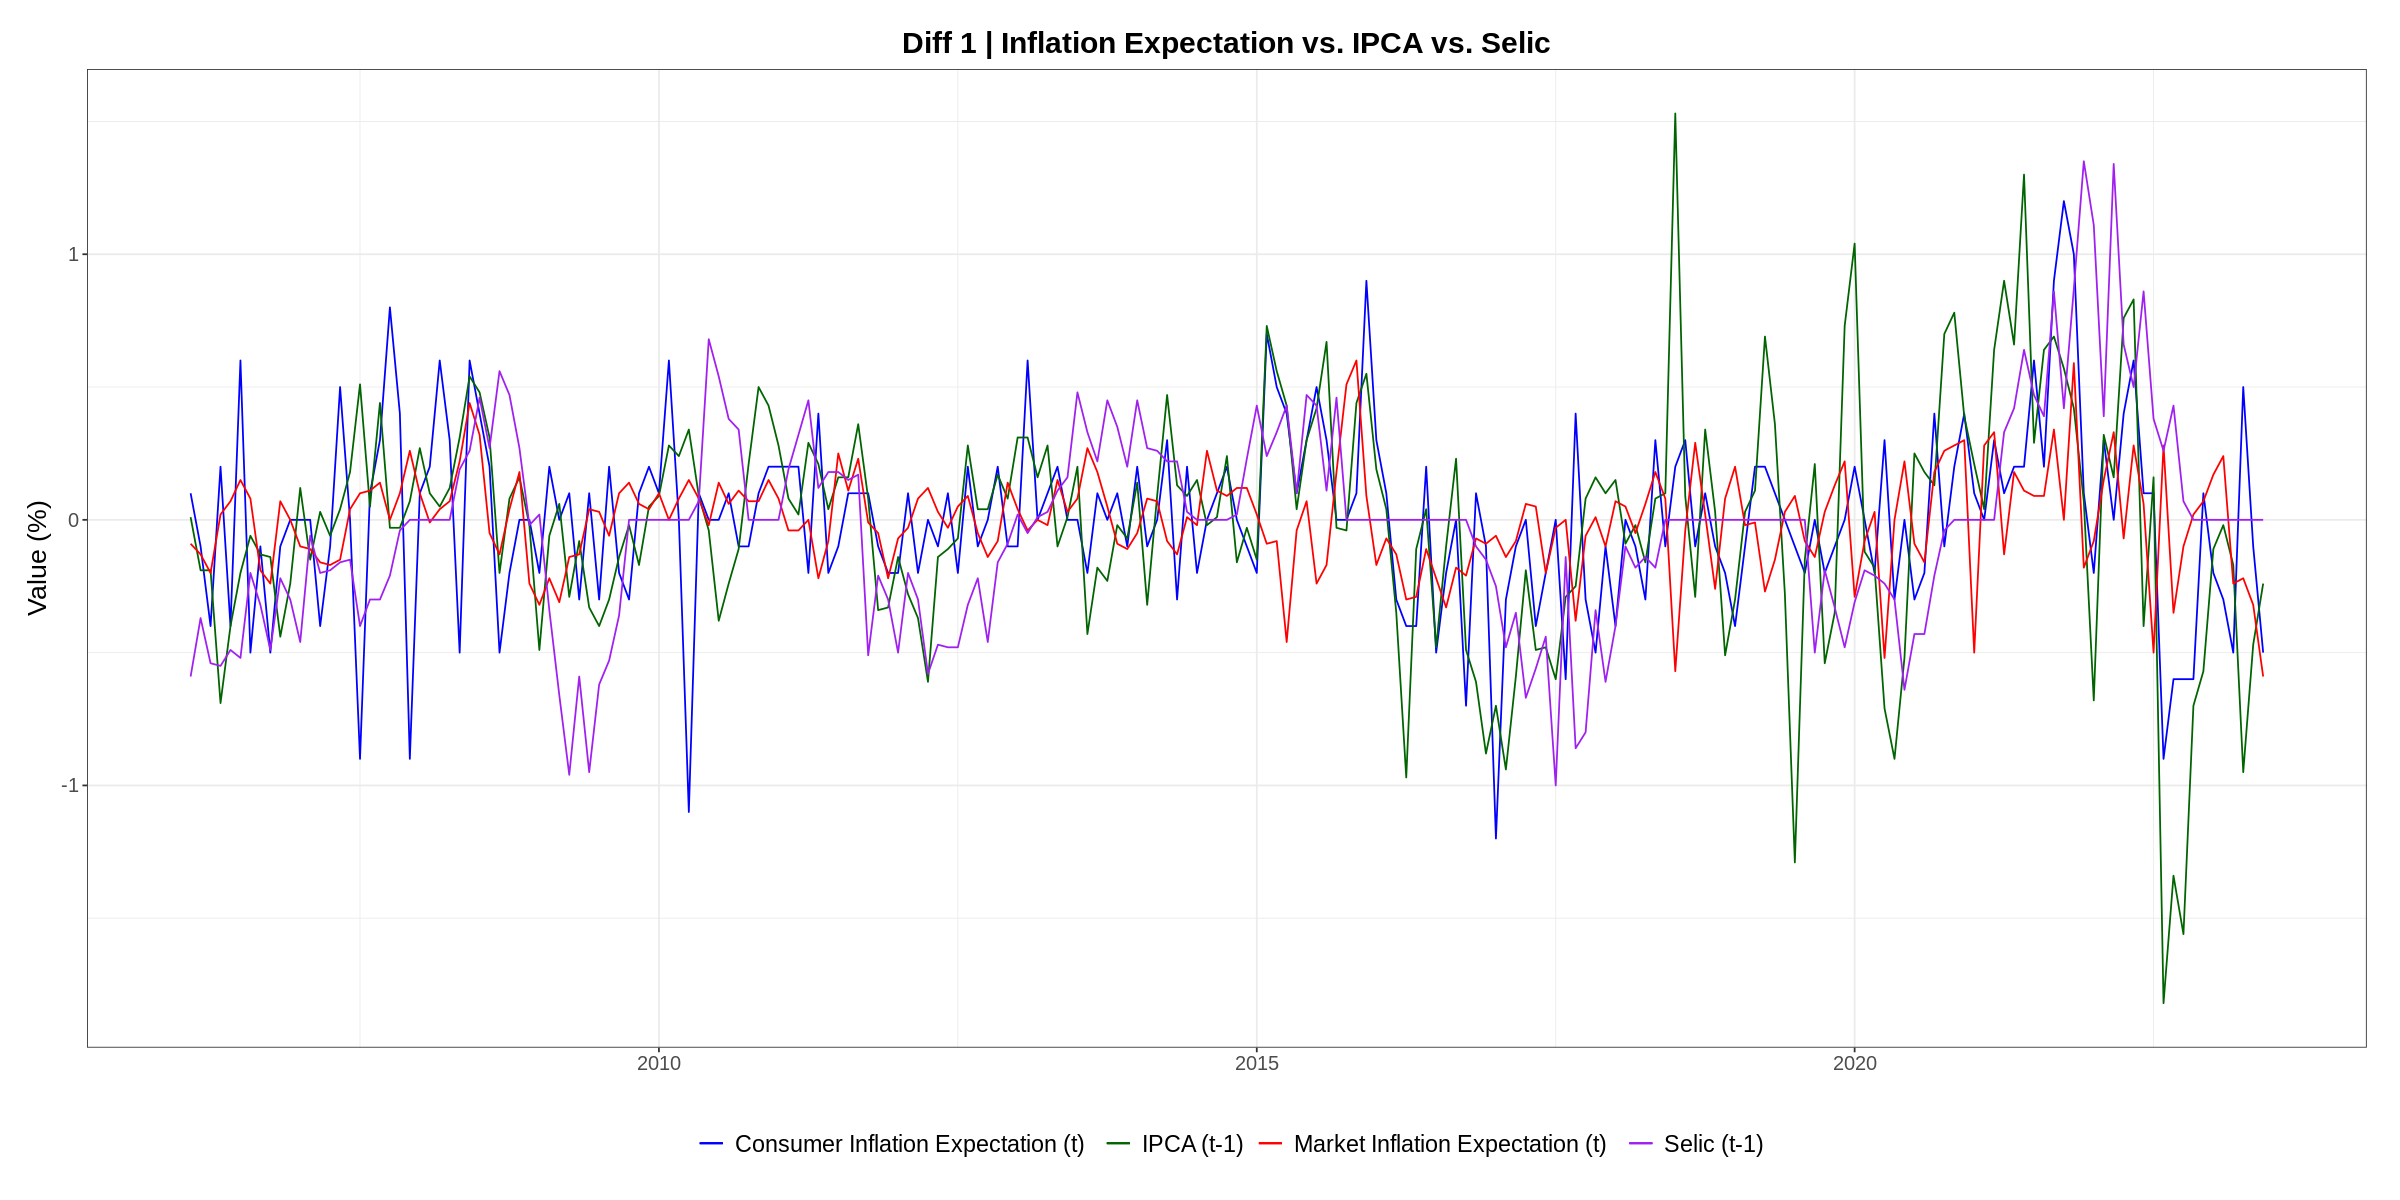

In [13]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Plotar as séries temporais de "consumer_inflation_expectation" e "market_inflation_expectation"
ggplot(df_public_data_diff) +
  geom_line(aes(x = month, y = diff_consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = diff_ipca_lag, color = "IPCA (t-1)")) +
  geom_line(aes(x = month, y = diff_market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = diff_selic_lag, color = "Selic (t-1)")) +
  labs(x = "", y = "Value (%)", title = "Diff 1 | Inflation Expectation vs. IPCA vs. Selic") +
  scale_color_manual(values = c("blue", "darkgreen", "red", "purple"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

#### ADF (Augmented-Dickey-Fuller)

- $H_0$: possui raiz unitária

  * _tau3_: hipótese nula (raiz unitária)
  * _phi2_: hipótese nula (raiz unitária, sem tendência e sem drift)
  * _phi3_: hipótese nula (raiz unitária e sem tendência)

In [14]:
### Consumer Inflation Expectation
summary( ur.df( df_public_data_diff$diff_consumer_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12882 -0.15898  0.00344  0.17210  0.95045 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.321e-04  5.110e-02   0.003 0.997941    
z.lag.1      -7.039e-01  1.643e-01  -4.284 2.98e-05 ***
tt            9.007e-05  4.166e-04   0.216 0.829056    
z.diff.lag1  -1.253e-01  1.601e-01  -0.782 0.434978    
z.diff.lag2  -1.341e-01  1.568e-01  -0.855 0.393512    
z.diff.lag3  -2.687e-02  1.578e-01  -0.170 0.865020    
z.diff.lag4  -5.173e-02  1.559e-01  -0.332 0.740488    
z.diff.lag5   1.794e-01  1.529e-01   1.173 0.242199    
z.diff.lag6   2.190e-01  1.492e-01   1.468 0.143822    
z.diff.lag7   2.357e-01  1.468e-01   1.606 0.110113    
z.diff.lag8   2.592e-01  1.412e-

**Resultado**

- Como, em módulo, os valores de test-statistic são **maiores** que tau3, phi2 e phi3, **rejeita-se** as hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **não possui raiz unitária**, o que significa que é **estacionária**.

In [15]:
### Market Inflation Expectation
summary( ur.df( df_public_data_diff$diff_market_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67248 -0.10017  0.00189  0.10440  0.45024 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.0210877  0.0279321   0.755  0.45125   
z.lag.1      -0.6595802  0.1984075  -3.324  0.00107 **
tt           -0.0001825  0.0002250  -0.811  0.41841   
z.diff.lag1   0.0246003  0.1937529   0.127  0.89911   
z.diff.lag2  -0.1110179  0.1878525  -0.591  0.55527   
z.diff.lag3   0.0619693  0.1756362   0.353  0.72463   
z.diff.lag4   0.0414614  0.1688426   0.246  0.80630   
z.diff.lag5   0.0215485  0.1551823   0.139  0.88972   
z.diff.lag6   0.0293766  0.1455911   0.202  0.84032   
z.diff.lag7  -0.0707812  0.1379464  -0.513  0.60850   
z.diff.lag8  -0.1790128  0.1297954  -1.379 

**Resultado**

- Como, em módulo, os valores de test-statistic são **maiores** que tau3 e phi3, mas não que phi2, **rejeita-se** 2 das 3 hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **não possui raiz unitária**, o que significa que é **estacionária**, mas a série é **não estacionária** após a segunda diferenciação.

#### KPSS

- $H_0$: não possui raiz unitária

In [16]:
### Consumer Inflation Expectation
summary( ur.kpss( df_public_data_diff$diff_consumer_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0698 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é **menor** que o valor crítico, **não se rejeita** a hipótese nula para um nível de significância de 10%, ou seja, a série **não possui raiz unitária**, o que significa que é **estacionária**.

In [17]:
### Market Inflation Expectation
summary( ur.kpss( df_public_data_diff$diff_market_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0661 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é **menor** que o valor crítico, **não se rejeita** a hipótese nula para um nível de significância de 10%, ou seja, a série **não possui raiz unitária**, o que significa que é **estacionária**.

### **Modelo Linear**

In [18]:
# Consumer Inflation Expectation
ols_model_consumer <- lm(consumer_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

summary(ols_model_consumer)


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3694 -0.2961  0.3914  1.3538  3.8899 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
ipca_lag  1.14231    0.01569   72.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.395 on 209 degrees of freedom
Multiple R-squared:  0.962,	Adjusted R-squared:  0.9619 
F-statistic:  5297 on 1 and 209 DF,  p-value: < 2.2e-16


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
`geom_smooth()` using formula = 'y ~ x'


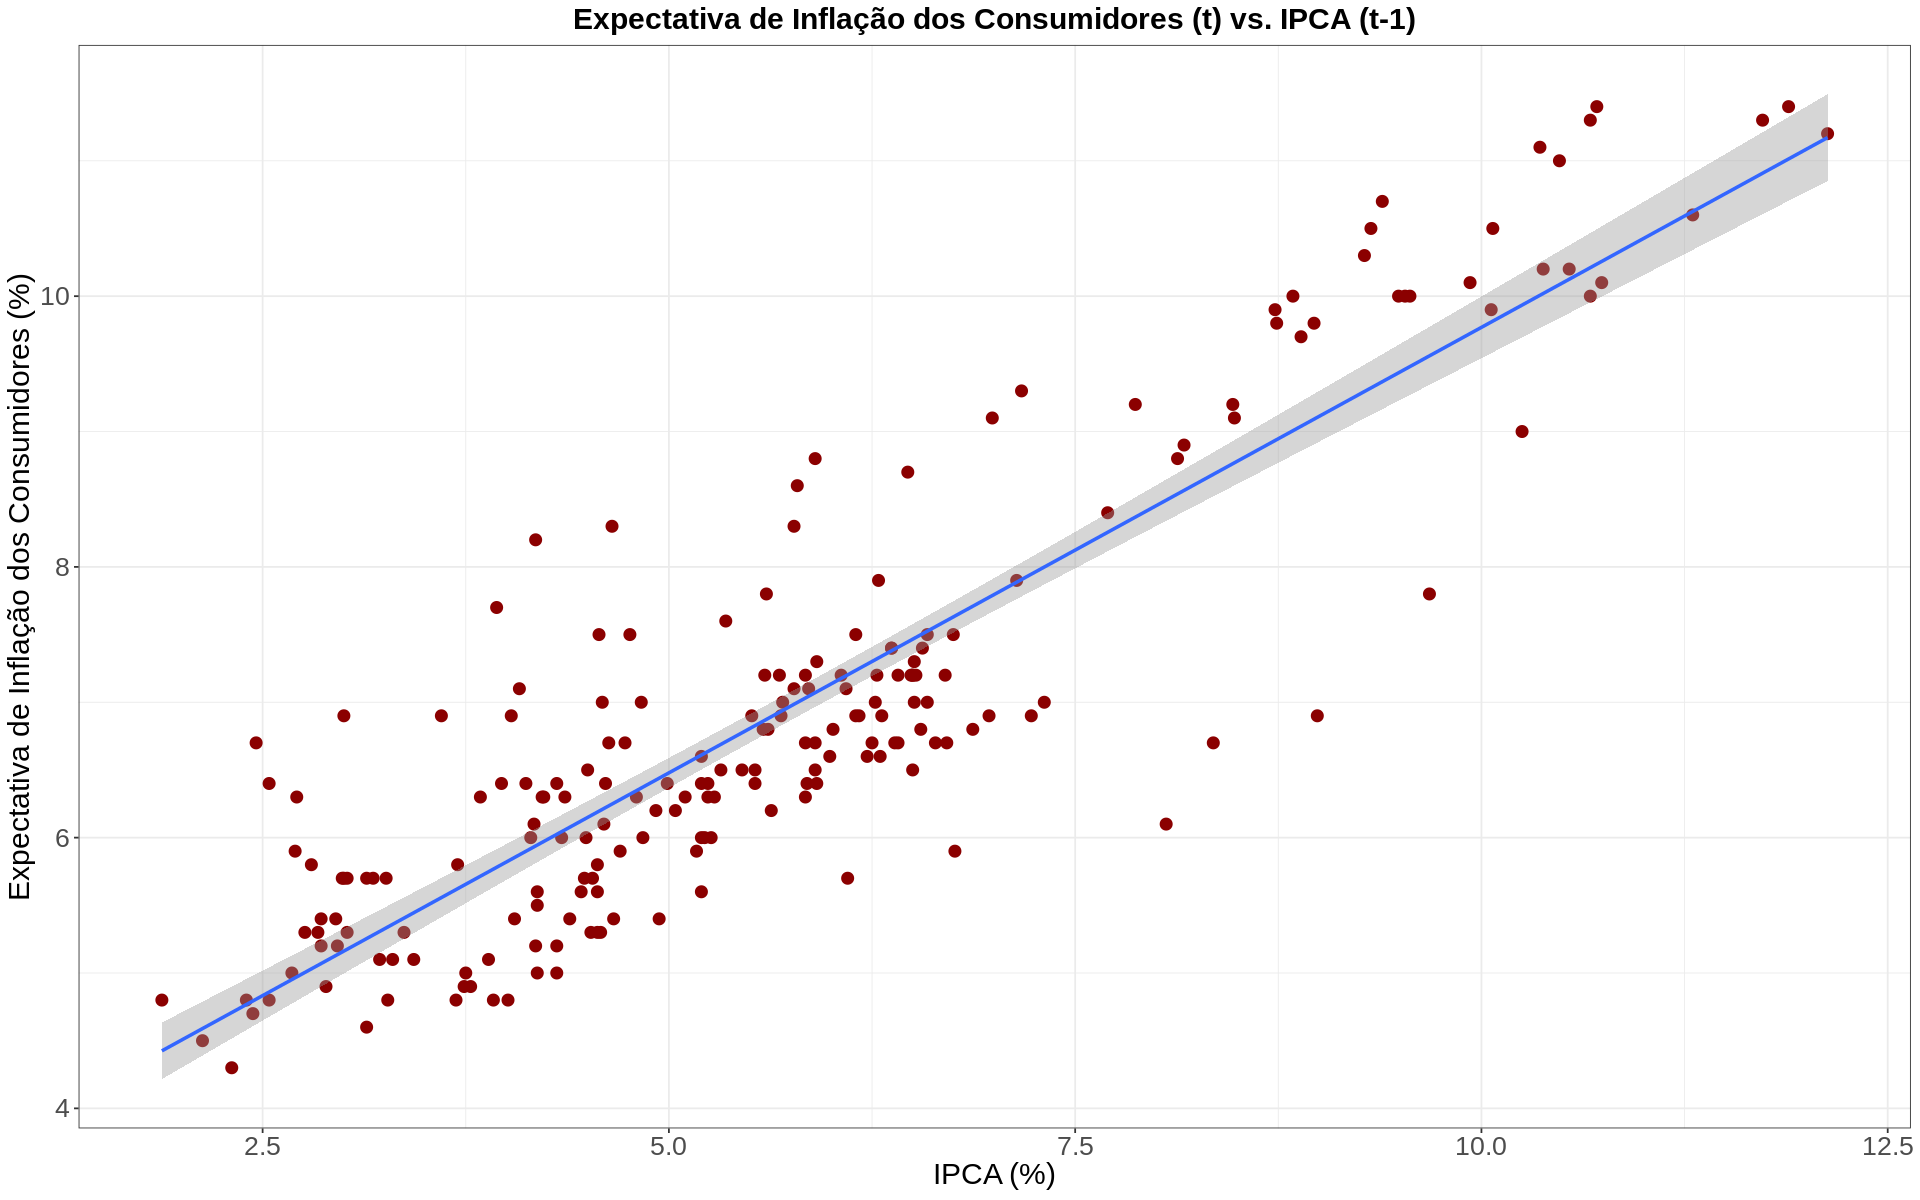

In [19]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o gráfico de dispersão de "consumer_inflation_expectation" e "ipca_lag" com regressão linear
ggplot(df_public_data, aes(x = ipca_lag, y = consumer_inflation_expectation)) +
  geom_point(color = "darkred", size = 3) +
  geom_smooth(method = "lm") +
  labs(x = "IPCA (%)", y = "Expectativa de Inflação dos Consumidores (%)", title = "Expectativa de Inflação dos Consumidores (t) vs. IPCA (t-1)") +
  theme_bw() +
  theme(legend.text = element_text(size = 12),
        legend.title = element_text("Ano"),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [20]:
# Market Inflation Expectation
ols_model_market <- lm(market_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

summary(ols_model_market)


Call:
lm(formula = market_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8649  0.0681  0.7228  1.2479  2.3397 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
ipca_lag  0.77501    0.01492   51.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.326 on 209 degrees of freedom
Multiple R-squared:  0.9281,	Adjusted R-squared:  0.9278 
F-statistic:  2700 on 1 and 209 DF,  p-value: < 2.2e-16


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
`geom_smooth()` using formula = 'y ~ x'


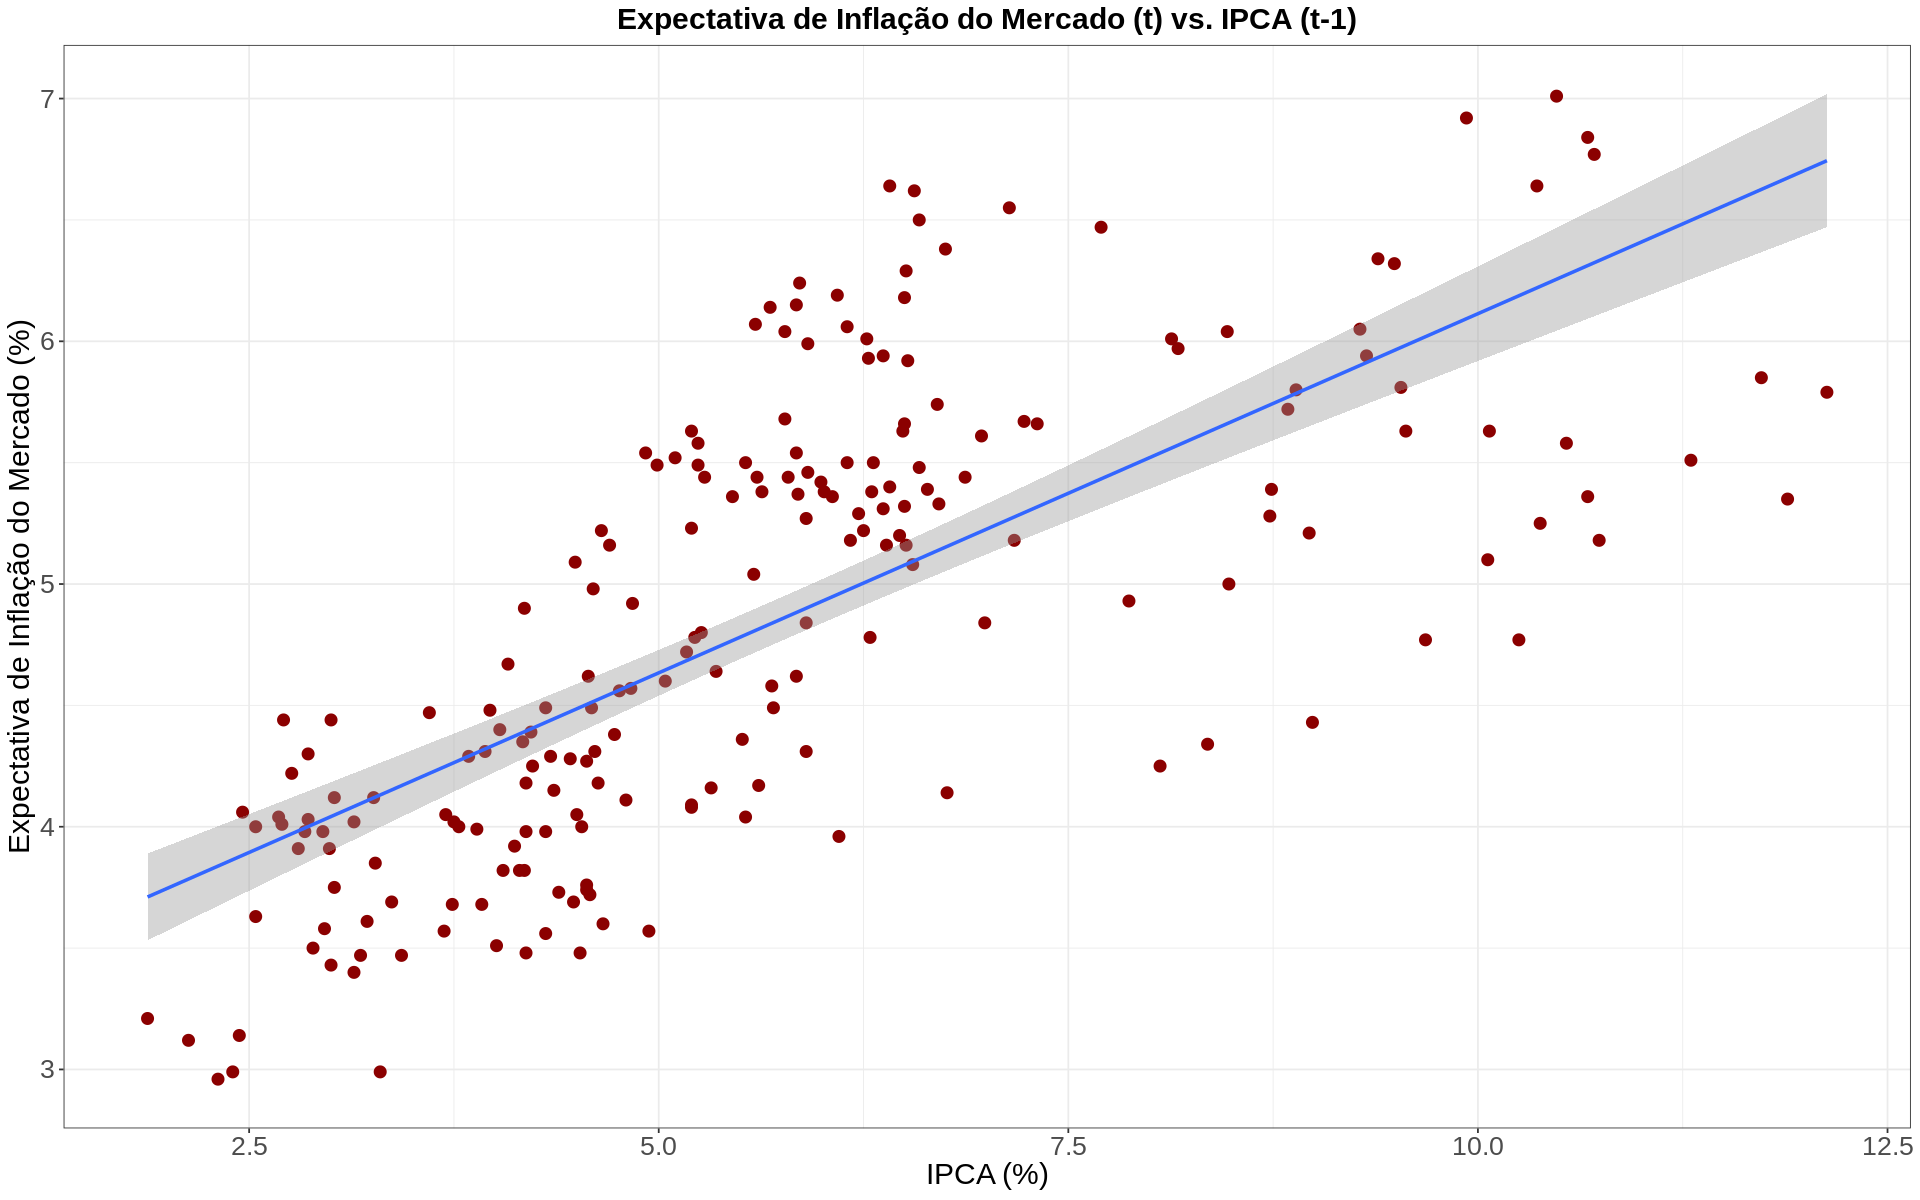

In [21]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o gráfico de dispersão de "market_inflation_expectation" e "ipca_lag" com regressão linear
ggplot(df_public_data, aes(x = ipca_lag, y = market_inflation_expectation)) +
  geom_point(color = "darkred", size = 3) +
  geom_smooth(method = "lm") +
  labs(x = "IPCA (%)", y = "Expectativa de Inflação do Mercado (%)", title = "Expectativa de Inflação do Mercado (t) vs. IPCA (t-1)") +
  theme_bw() +
  theme(legend.text = element_text(size = 12),
        legend.title = element_text("Ano"),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

### **Modelo VAR**

In [22]:
# Selecionar variáveis do modelo VAR
var_model_variables <- df_public_data[, c("consumer_inflation_expectation", "ipca_lag")]

In [23]:
# Selecionar a ordem adequada do modelo VAR
lag_select <- VARselect(var_model_variables, lag.max = 12, type = "const")

print(lag_select$selection)

AIC(n)  HQ(n)  SC(n) FPE(n) 
     2      2      2      2 


In [24]:
# Ajustar o modelo VAR com uma ordem escolhida
var_model = VAR(var_model_variables, p = 2, type = "const")

summary(var_model)


VAR Estimation Results:
Endogenous variables: consumer_inflation_expectation, ipca_lag 
Deterministic variables: const 
Sample size: 208 
Log Likelihood: -112.774 
Roots of the characteristic polynomial:
0.9329 0.9329 0.5376 0.05034
Call:
VAR(y = var_model_variables, p = 2, type = "const")


Estimation results for equation consumer_inflation_expectation: 
consumer_inflation_expectation = consumer_inflation_expectation.l1 + ipca_lag.l1 + consumer_inflation_expectation.l2 + ipca_lag.l2 + const 

                                  Estimate Std. Error t value Pr(>|t|)    
consumer_inflation_expectation.l1  0.87005    0.07394  11.767  < 2e-16 ***
ipca_lag.l1                        0.30652    0.05356   5.723 3.72e-08 ***
consumer_inflation_expectation.l2 -0.01624    0.06942  -0.234 0.815226    
ipca_lag.l2                       -0.19628    0.05947  -3.301 0.001140 ** 
const                              0.38911    0.11212   3.471 0.000634 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.

In [25]:
# Serial Correlation
serial_test <- serial.test(var_model, lags.pt = 12, type = "PT.asymptotic")

print(serial_test)


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_model
Chi-squared = 76.908, df = 40, p-value = 0.0004039



$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_model
Chi-squared = 76.908, df = 40, p-value = 0.0004039



**Resultado**

- Como o p-value é menor que um nível de significância de 5%, não se pode afirmar que as variáveis não possuem correlação serial

In [26]:
# Heteroscedasticity
arch_test <- arch.test(var_model, lags.multi = 12, multivariate.only = TRUE)

print(arch_test)


	ARCH (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 130.52, df = 108, p-value = 0.06923



$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 130.52, df = 108, p-value = 0.06923



**Resultado**

- Como o p-value é **maior** que um nível de significância de 5%, pode-se afirmar que o modelo não possui heteroscedasticidade

In [27]:
# Normal Distribution of Residuals
normal_test <- normality.test(var_model, multivariate.only = TRUE)

print(normal_test)

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 58.67, df = 4, p-value = 5.519e-12


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 0.83511, df = 2, p-value = 0.6587


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 57.835, df = 2, p-value = 2.762e-13




$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 58.67, df = 4, p-value = 5.519e-12


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 0.83511, df = 2, p-value = 0.6587


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 57.835, df = 2, p-value = 2.762e-13




**Resultado**

- Como o p-value é menor que um nível de significância de 5% no JB-test, não se pode afirmar que os resíduos são distribuídos de forma gaussiana

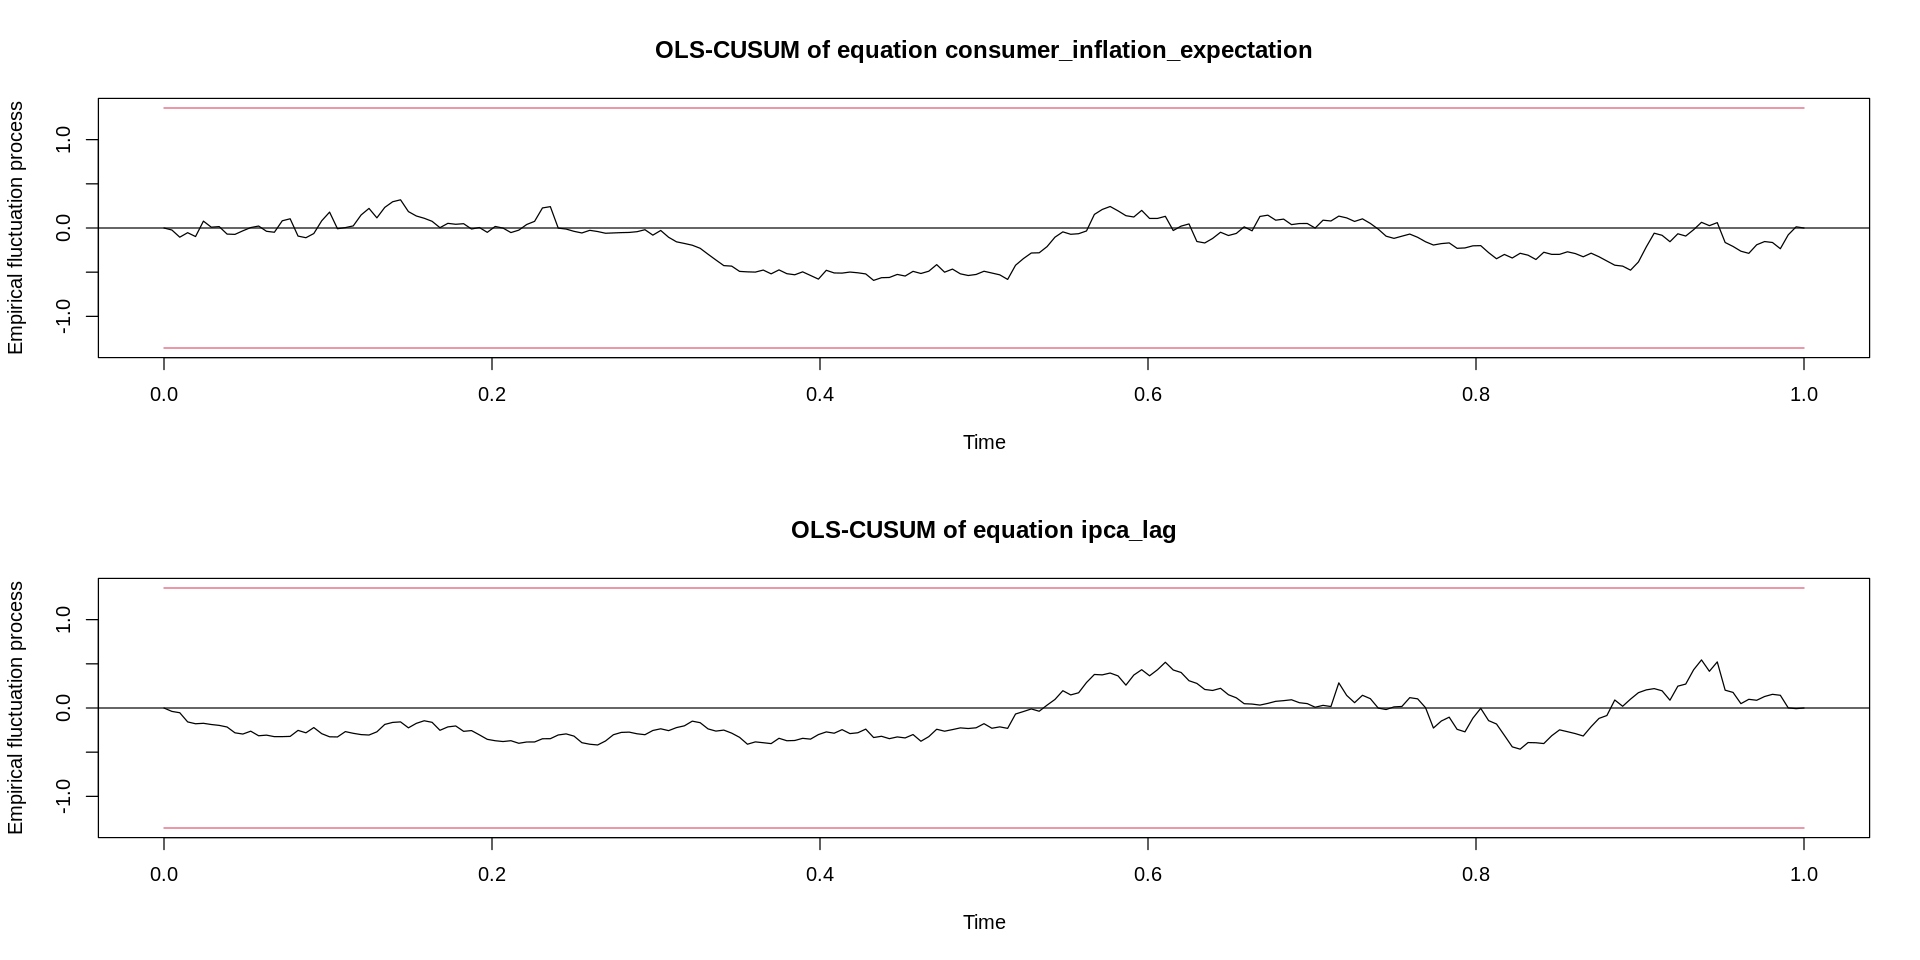

In [28]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 8)

# Structural Breaks in Residuals
stability_test <- stability(var_model, type = "OLS-CUSUM")

plot(stability_test)

**Resultado**

- Como os valores estão entre as barras vermelhas, pode-se afirmar que não há quebra estrutural nos resíduos

In [29]:
# Granger Causality
granger_consumer_expectation <- causality(var_model, cause = "ipca_lag")

print(granger_consumer_expectation)

$Granger

	Granger causality H0: ipca_lag do not Granger-cause
	consumer_inflation_expectation

data:  VAR object var_model
F-Test = 29.306, df1 = 2, df2 = 406, p-value = 1.293e-12


$Instant

	H0: No instantaneous causality between: ipca_lag and
	consumer_inflation_expectation

data:  VAR object var_model
Chi-squared = 19.671, df = 1, p-value = 9.2e-06




**Resultado**

- Como o p-valor é menor que um nível de significância de 5%, pode-se rejeitar a hipótese nula do teste de Granger e afirmar que IPCA causa, no sentido de Granger, variação na expectativa de inflação do consumidor

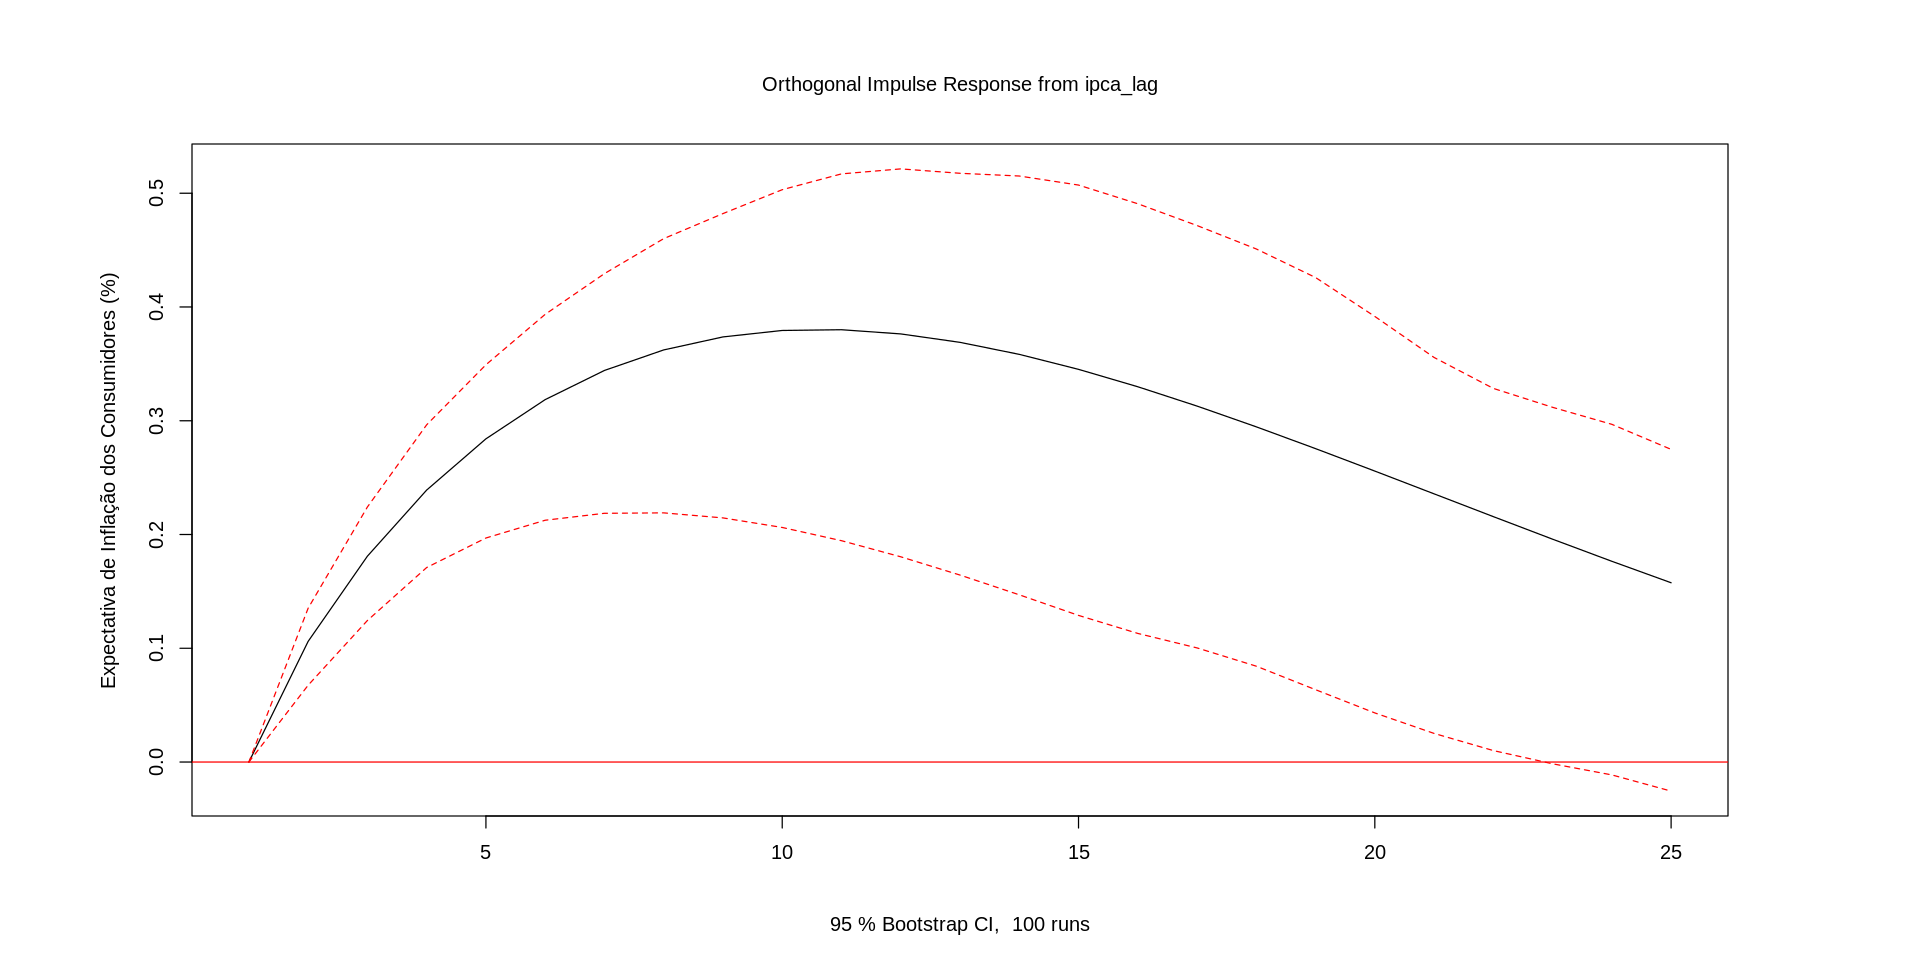

In [30]:
# Impulse Response Function
consumer_expectation_impulse = irf(var_model, impulse = "ipca_lag", response = "consumer_inflation_expectation", n.ahead = 24, boot = TRUE)

plot(consumer_expectation_impulse, ylab = "Expectativa de Inflação dos Consumidores (%)")

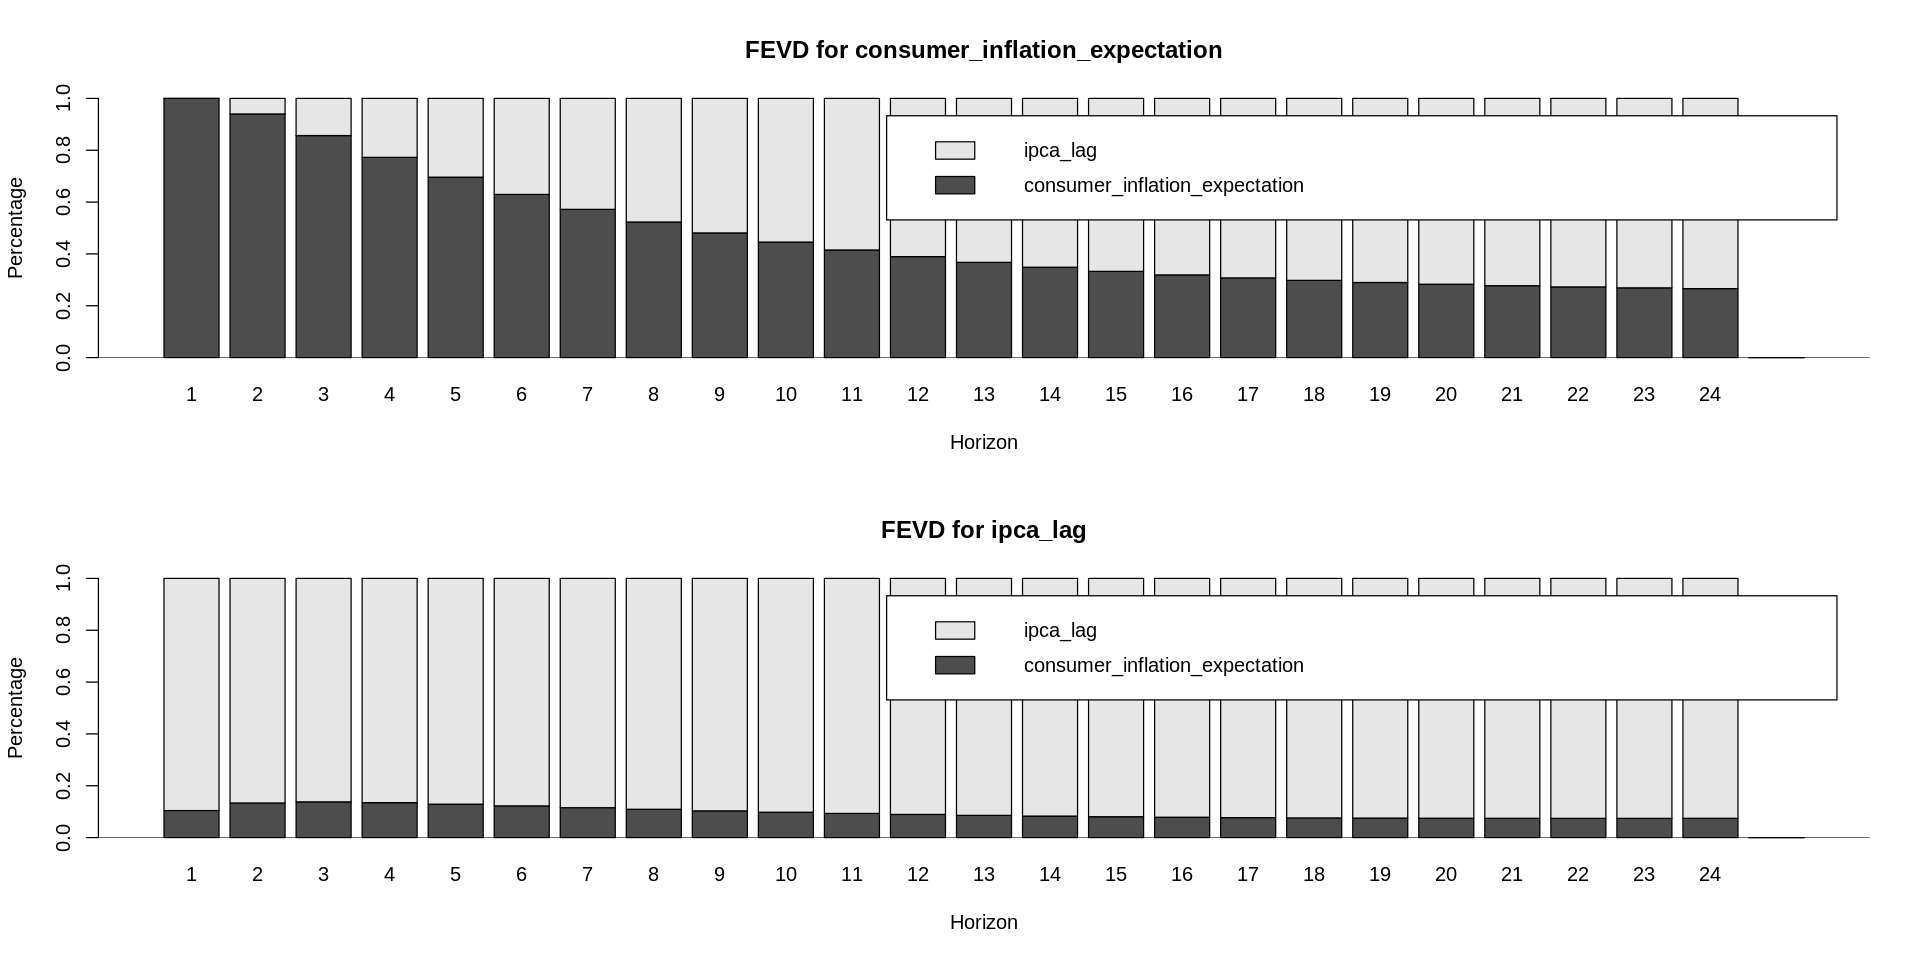

In [31]:
# Função de Variação de Valores Extremos
fevd_model <- fevd(var_model, n.ahead = 24)

plot(fevd_model)

**Resultado**

- Depois de ~8 meses, a Expectativa de Inflação dos Consumidores é mais explicada pelo IPCA do que a própria variável Expectativa de Inflação dos Consumidores

- A variável IPCA é, aproximadamente em sua totalidade, explicada pelo próprio IPCA

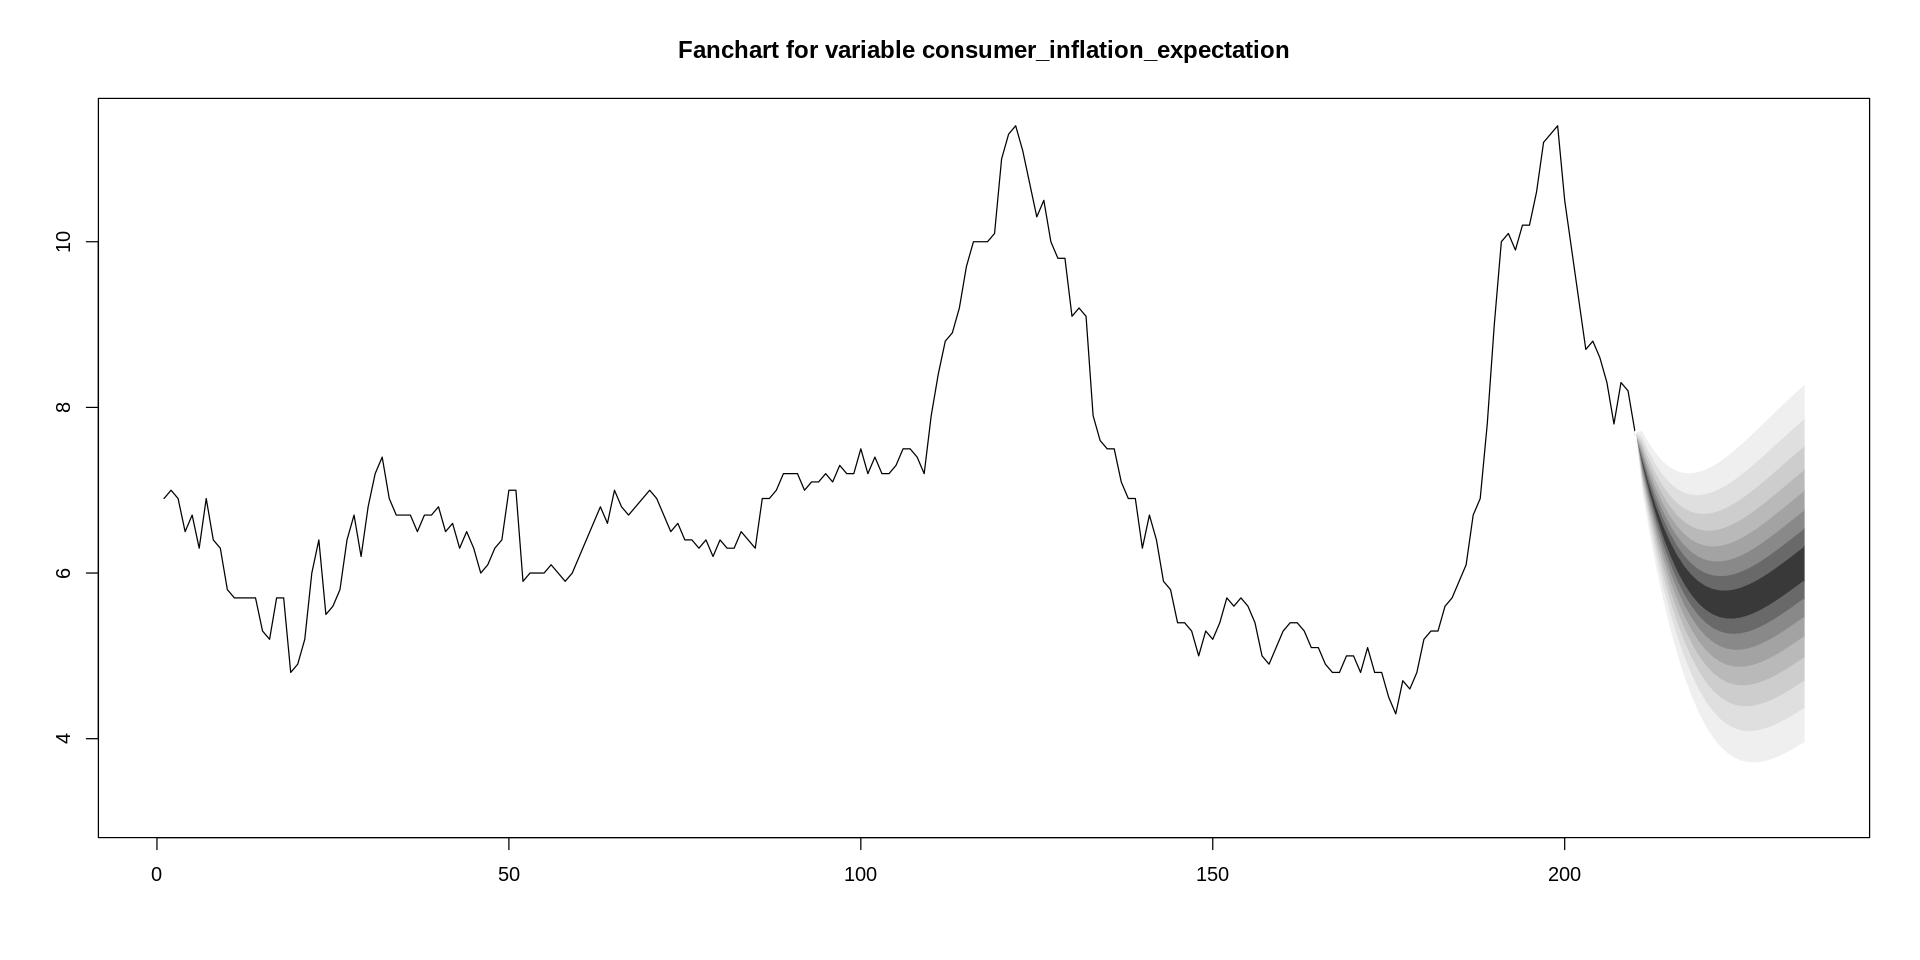

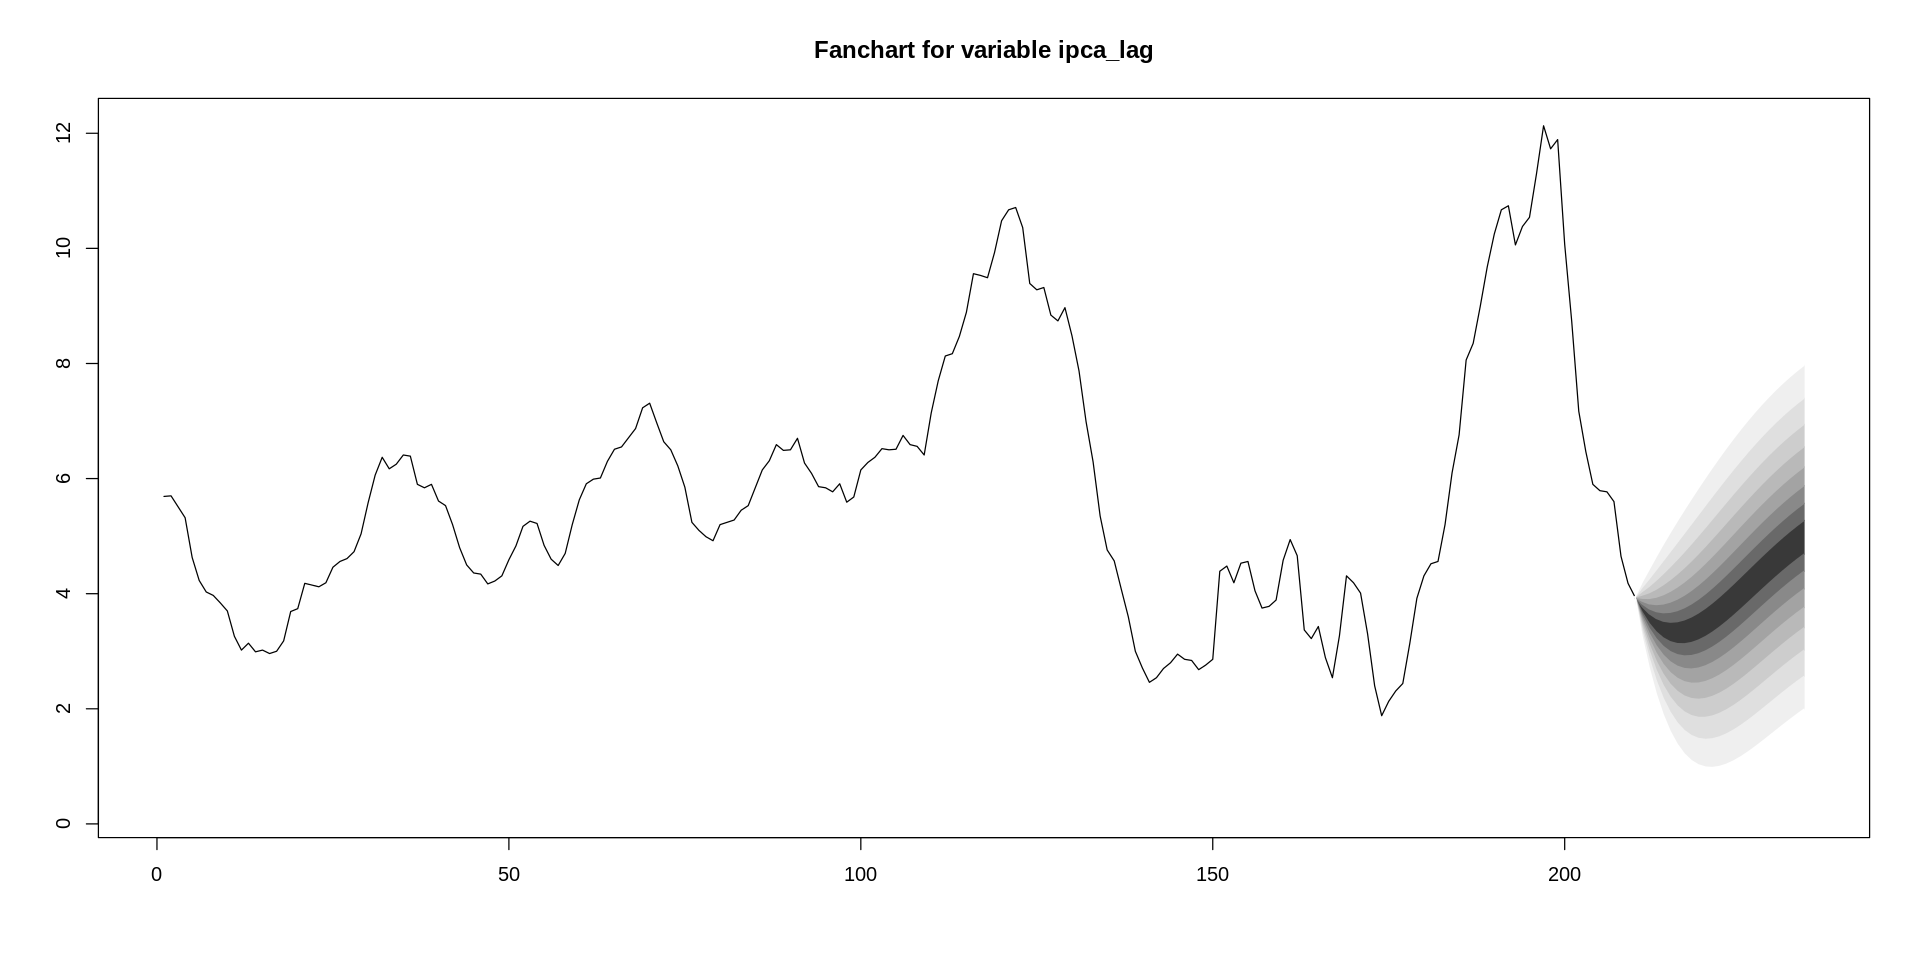

In [32]:
# Forecast using VAR
forecast_var <- predict(var_model, n.ahead = 24, ci = 0.95)

fanchart(forecast_var, names = "consumer_inflation_expectation")
fanchart(forecast_var, names = "ipca_lag")

### **Modelo VECM**

In [33]:
# Selecionar variáveis do modelo VECM
vecm_model_variables <- df_public_data[, c("consumer_inflation_expectation", "ipca_lag", "selic_lag")]

In [34]:
# Lag Selection (n-1)
vecm_lag <- VARselect(vecm_model_variables, lag.max = 12, type = "none")

print(vecm_lag$selection)

AIC(n)  HQ(n)  SC(n) FPE(n) 
     5      3      2      5 


In [35]:
# Johansen Test (Trace)
vecm_johansen_trace <- ca.jo(vecm_model_variables, type = "trace", ecdet = "none", K = 5)

summary(vecm_johansen_trace)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.11885018 0.06955540 0.03464777

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  7.23  6.50  8.18 11.65
r <= 1 | 22.01 15.66 17.95 23.52
r = 0  | 47.95 28.71 31.52 37.22

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                                  consumer_inflation_expectation.l5 ipca_lag.l5
consumer_inflation_expectation.l5                        1.00000000  1.00000000
ipca_lag.l5                                             -1.10978262 -0.45864430
selic_lag.l5                                            -0.06337312 -0.05667337
                                  selic_lag.l5
consumer_inflation_expectation.l5    1.0000000
ipca_lag.l5                          0.3072793
selic_lag.l5                        -1.1254926

Weights W:
(This is the loading matrix

**Resultado**

- r = 0: Como teststatistic é maior que critical value a um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, existe ao menos 1 relação de cointegração no sistema

- r <= 1: Como teststatistic é maior que critical value a um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, existe ao menos 2 relações de cointegração no sistema

- r <= 2: Como teststatistic é menor que critical value a um nível de significância de 5%, não se rejeita a hipótese nula, ou seja, existe no máximo 2 relações de cointegração no sistema

In [36]:
# Johansen Test (MaxEigen)
vecm_johansen_eigen <- ca.jo(vecm_model_variables, type = "eigen", ecdet = "none", K = 5)

summary(vecm_johansen_eigen)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.11885018 0.06955540 0.03464777

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  7.23  6.50  8.18 11.65
r <= 1 | 14.78 12.91 14.90 19.19
r = 0  | 25.94 18.90 21.07 25.75

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                                  consumer_inflation_expectation.l5 ipca_lag.l5
consumer_inflation_expectation.l5                        1.00000000  1.00000000
ipca_lag.l5                                             -1.10978262 -0.45864430
selic_lag.l5                                            -0.06337312 -0.05667337
                                  selic_lag.l5
consumer_inflation_expectation.l5    1.0000000
ipca_lag.l5                          0.3072793
selic_lag.l5                        -1.1254926

Weights W:
(

**Resultado**

- r = 0: Como teststatistic é maior que critical value a um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, existe ao menos 1 relação de cointegração no sistema

- r <= 1: Como teststatistic é menor que critical value a um nível de significância de 5%, não se rejeita a hipótese nula, ou seja, existe no máximo 1 relação de cointegração no sistema

In [37]:
# Criar modelo VECM
vecm_model <- VECM(vecm_model_variables, 5, r = 2, estim = ("ML"))

summary(vecm_model)

#############
###Model VECM 
#############
Full sample size: 210 	End sample size: 204
Number of variables: 3 	Number of estimated slope parameters 54
AIC -1569.655 	BIC -1383.841 	SSR 47.10212
Cointegrating vector (estimated by ML):
   consumer_inflation_expectation      ipca_lag    selic_lag
r1                    1.00000e+00 -1.110223e-16 -0.065164352
r2                    5.88181e-17  1.000000e+00  0.009231982


                                        ECT1                ECT2               
Equation consumer_inflation_expectation -0.1623(0.0456)***  0.1087(0.0353)**   
Equation ipca_lag                       -0.0069(0.0558)     -0.0735(0.0431).   
Equation selic_lag                      0.0337(0.0287)      -0.0149(0.0221)    
                                        Intercept          
Equation consumer_inflation_expectation 0.3971(0.1310)**   
Equation ipca_lag                       0.4714(0.1601)**   
Equation selic_lag                      -0.1282(0.0823)    
                     

In [38]:
# VECM specification to VAR specification
vecm_model_formatted <- vec2var(vecm_johansen_trace, r = 2)

In [39]:
# Serial Correlation
vecm_serial_test <- serial.test(vecm_model_formatted, lags.pt = 12, type = "PT.asymptotic")

print(vecm_serial_test)


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 114.67, df = 66, p-value = 0.0001929



$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 114.67, df = 66, p-value = 0.0001929



**Resultado**

- Como o p-value é menor que um nível de significância de 5%, não se pode afirmar que as variáveis não possuem correlação serial

In [40]:
# Heteroscedasticity
vecm_arch_test <- arch.test(vecm_model_formatted, lags.multi = 12, multivariate.only = TRUE)

print(vecm_arch_test)


	ARCH (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 528.19, df = 432, p-value = 0.001038



$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 528.19, df = 432, p-value = 0.001038



**Resultado**

- Como o p-value é menor que um nível de significância de 5%, não se pode afirmar que o modelo não possui heteroscedasticidade

In [41]:
# Normal Distribution of Residuals
vecm_normal_test <- normality.test(vecm_model_formatted, multivariate.only = TRUE)

print(vecm_normal_test)

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 126.86, df = 6, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 8.094, df = 3, p-value = 0.04411


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 118.76, df = 3, p-value < 2.2e-16




$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 126.86, df = 6, p-value < 2.2e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 8.094, df = 3, p-value = 0.04411


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 118.76, df = 3, p-value < 2.2e-16




**Resultado**

- Como o p-value é menor que um nível de significância de 5% no JB-test, não se pode afirmar que os resíduos são distribuídos de forma gaussiana

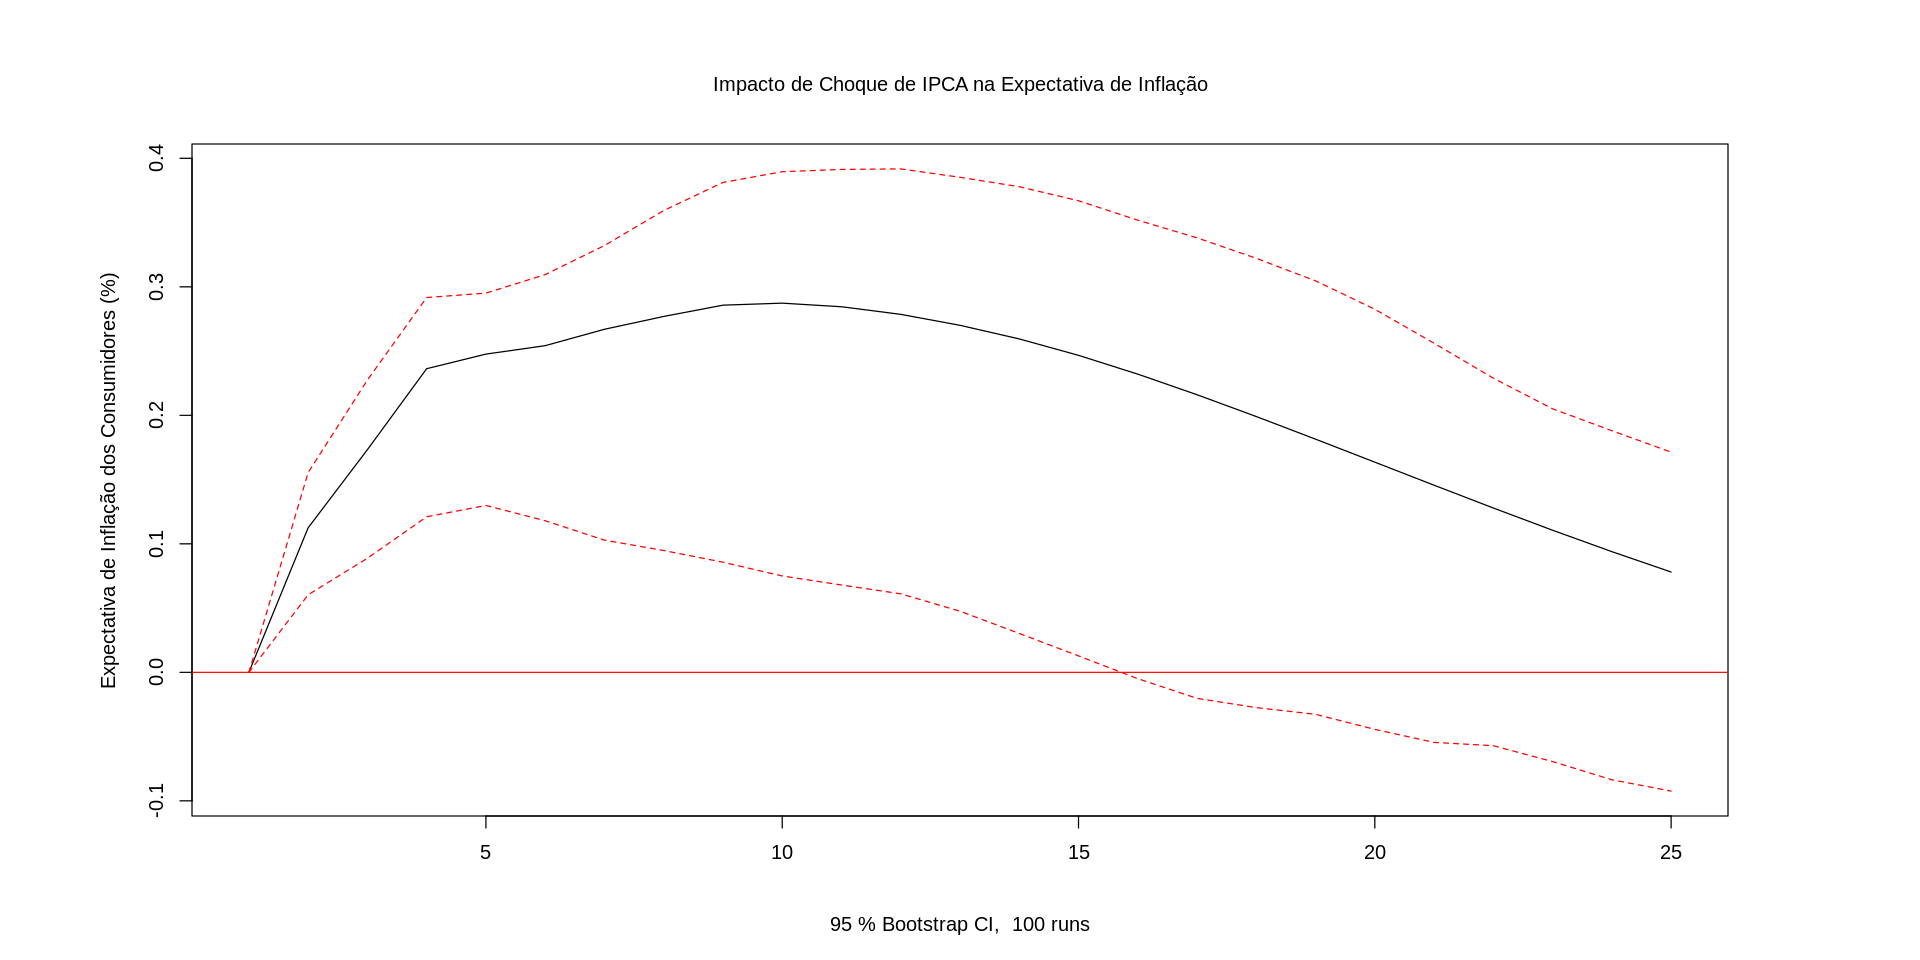

In [42]:
# Impulse Response Function
vecm_ipca_consumer_expectation_impulse = irf(vecm_model_formatted, impulse = "ipca_lag", response = "consumer_inflation_expectation", n.ahead = 24, boot = TRUE)

plot(vecm_ipca_consumer_expectation_impulse, ylab = "Expectativa de Inflação dos Consumidores (%)", main = "Impacto de Choque de IPCA na Expectativa de Inflação")

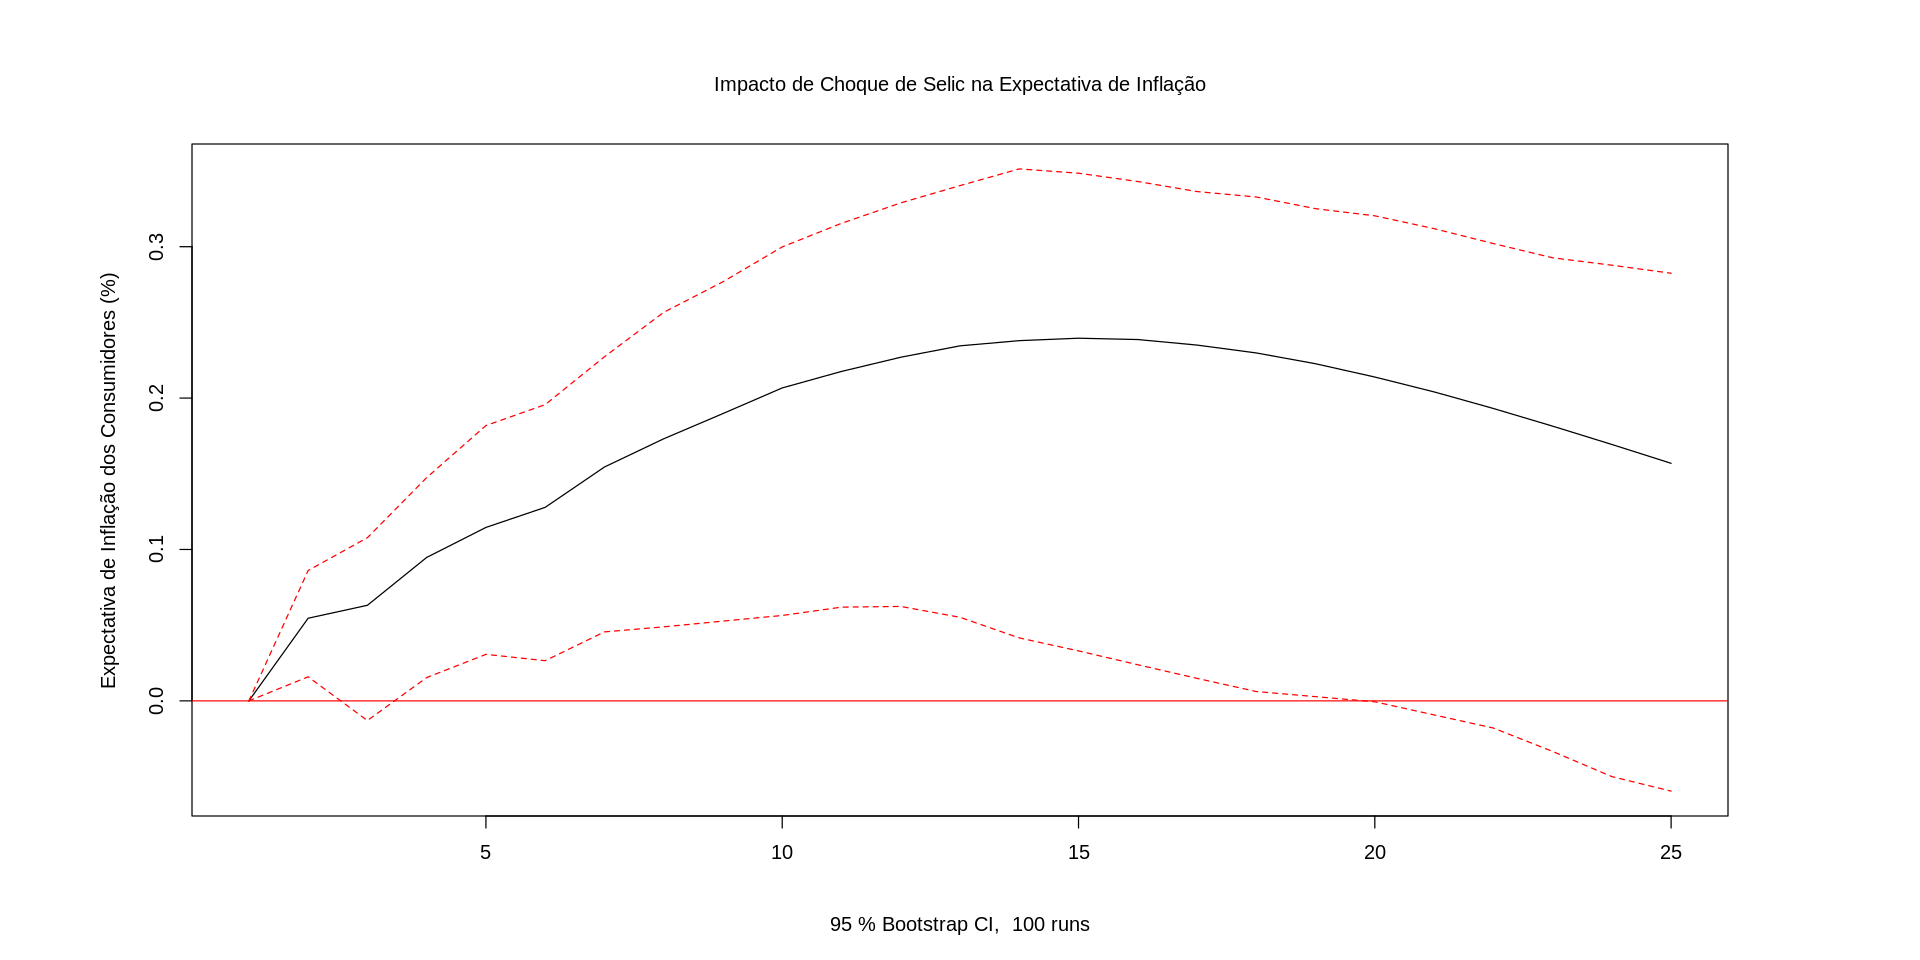

In [43]:
# Impulse Response Function
vecm_selic_consumer_expectation_impulse = irf(vecm_model_formatted, impulse = "selic_lag", response = "consumer_inflation_expectation", n.ahead = 24, boot = TRUE)

plot(vecm_selic_consumer_expectation_impulse, ylab = "Expectativa de Inflação dos Consumidores (%)", main = "Impacto de Choque de Selic na Expectativa de Inflação")

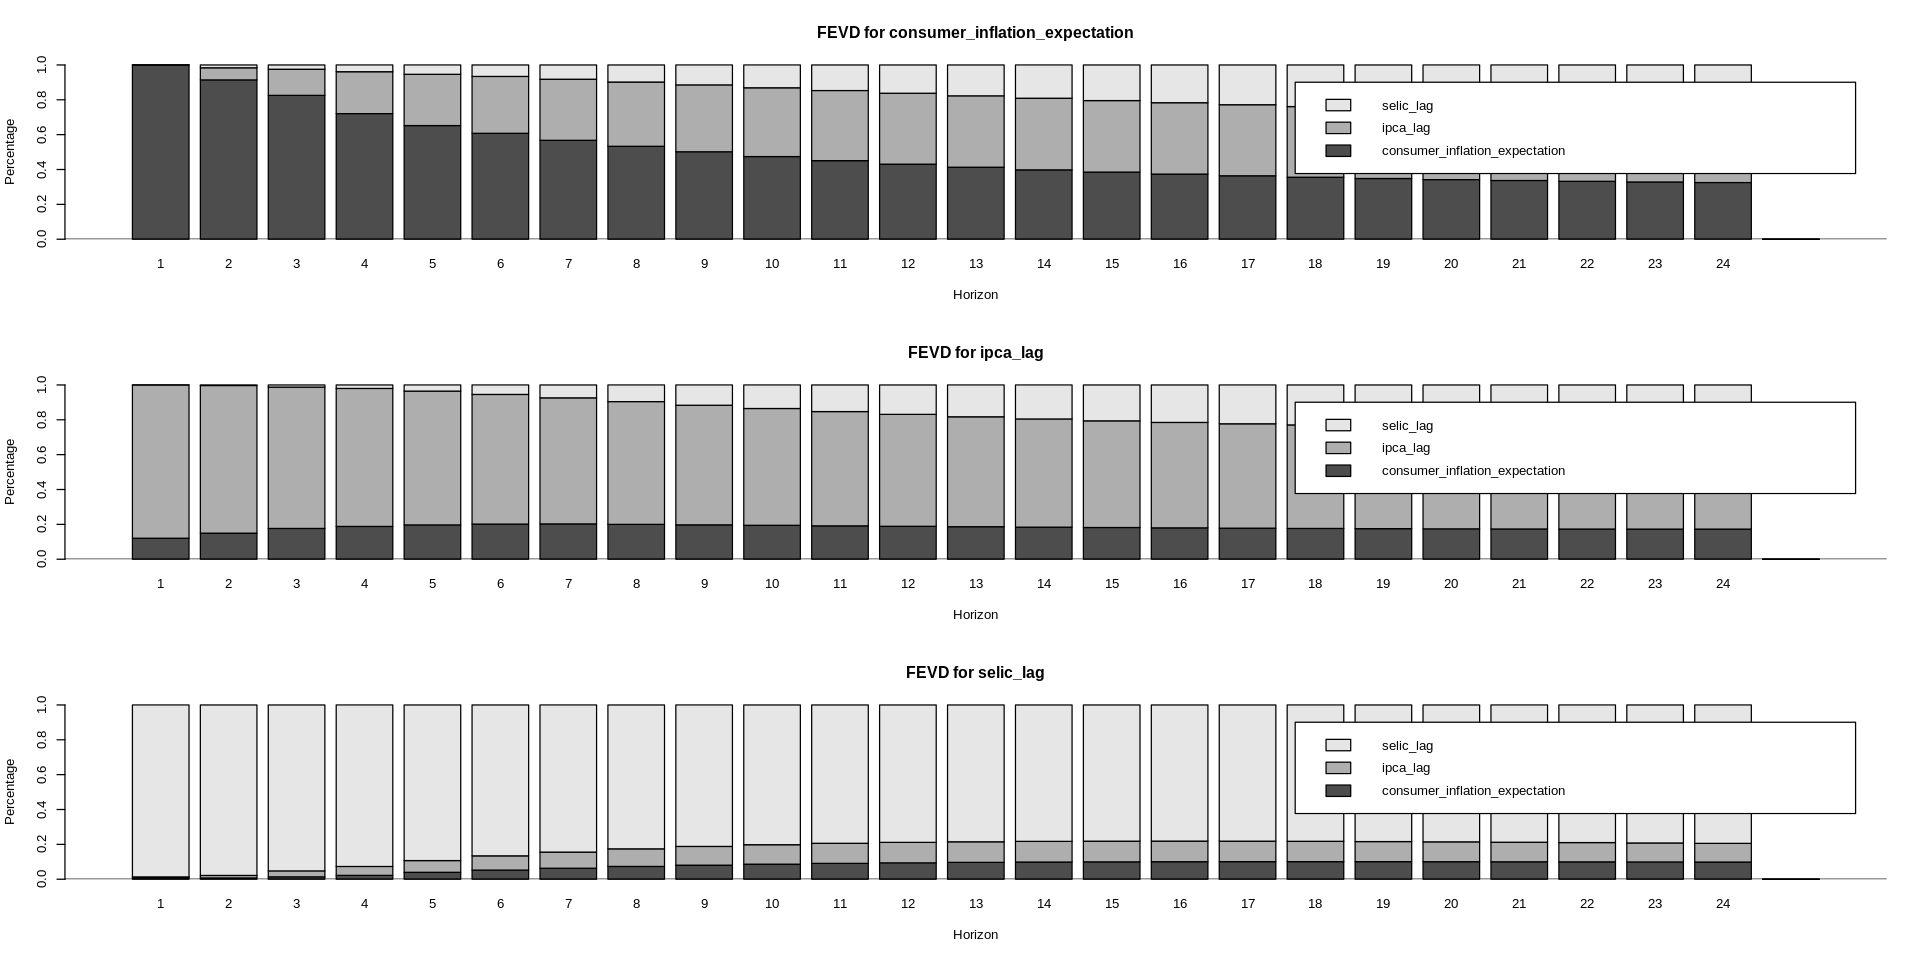

In [44]:
# Variance Decomposition
vecm_fevd <- fevd(vecm_model_formatted, n.ahead = 24)

plot(vecm_fevd)

**Resultado**

- Depois de ~9 meses, a Expectativa de Inflação dos Consumidores é mais explicada pelo IPCA e Selic do que a própria Expectativa de Inflação dos Consumidores

- As variáveis Selic e IPCA são, em sua maioria, explicadas por elas mesmas

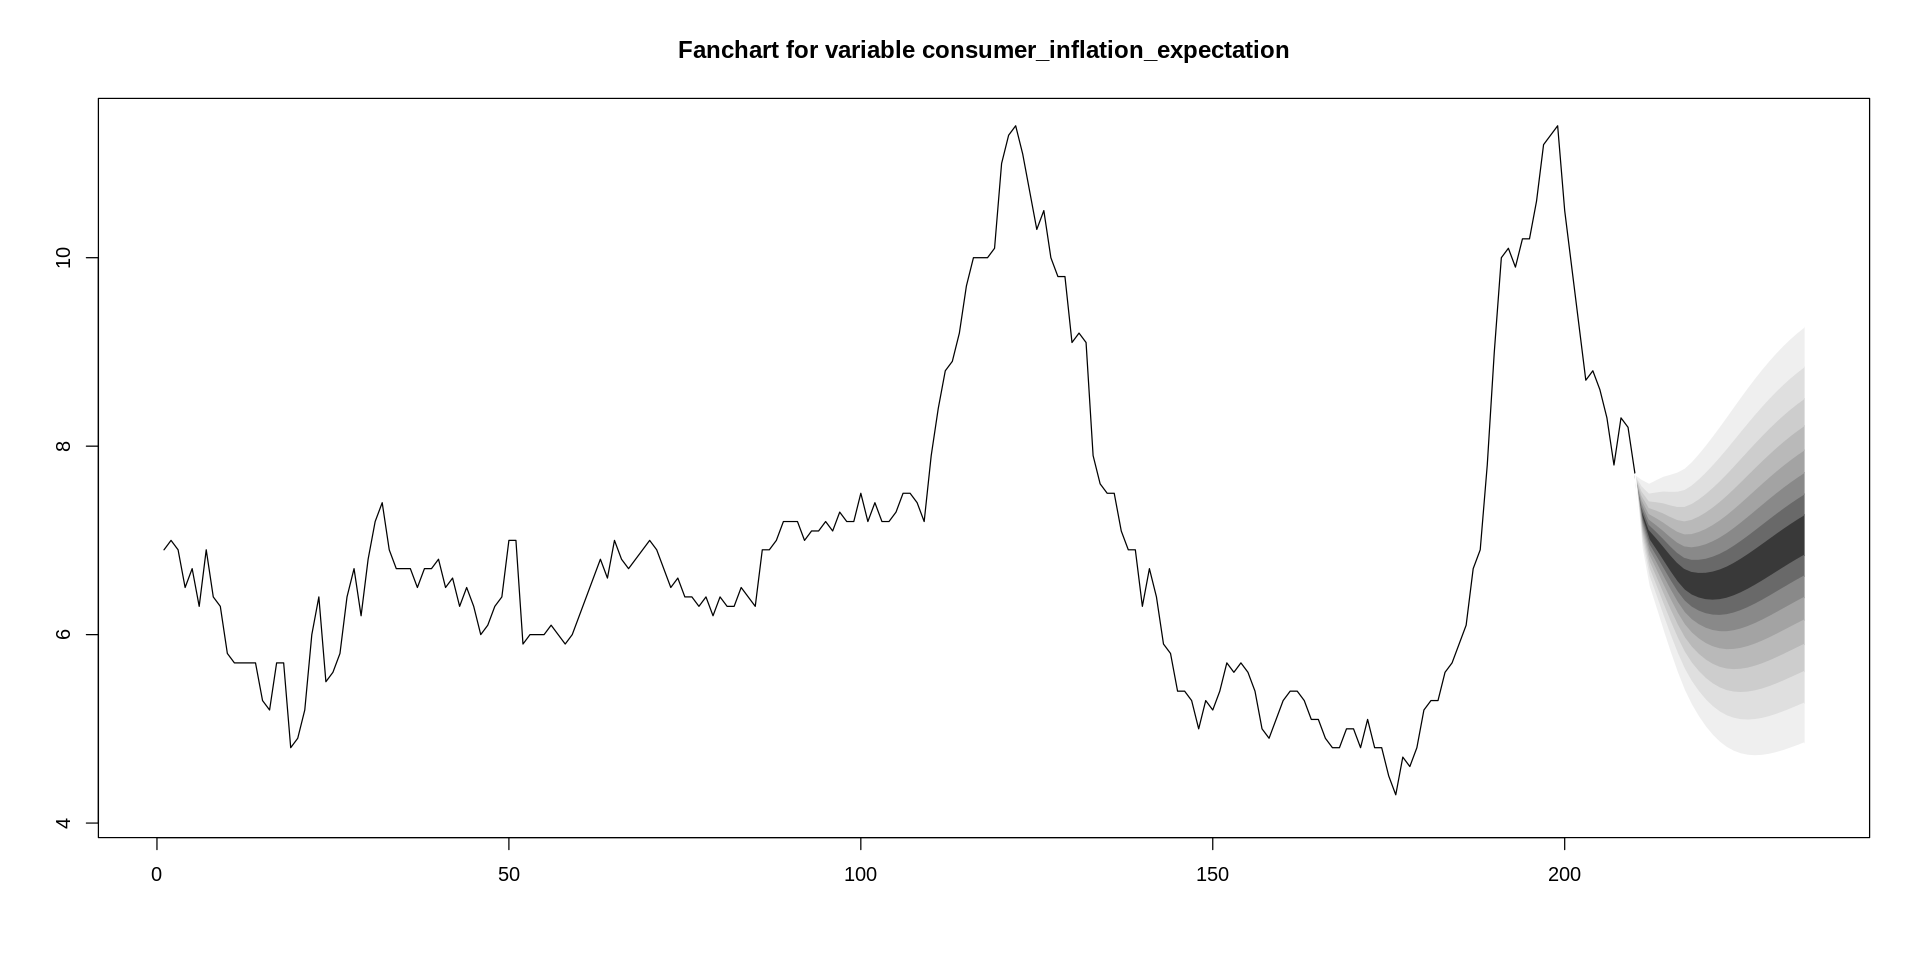

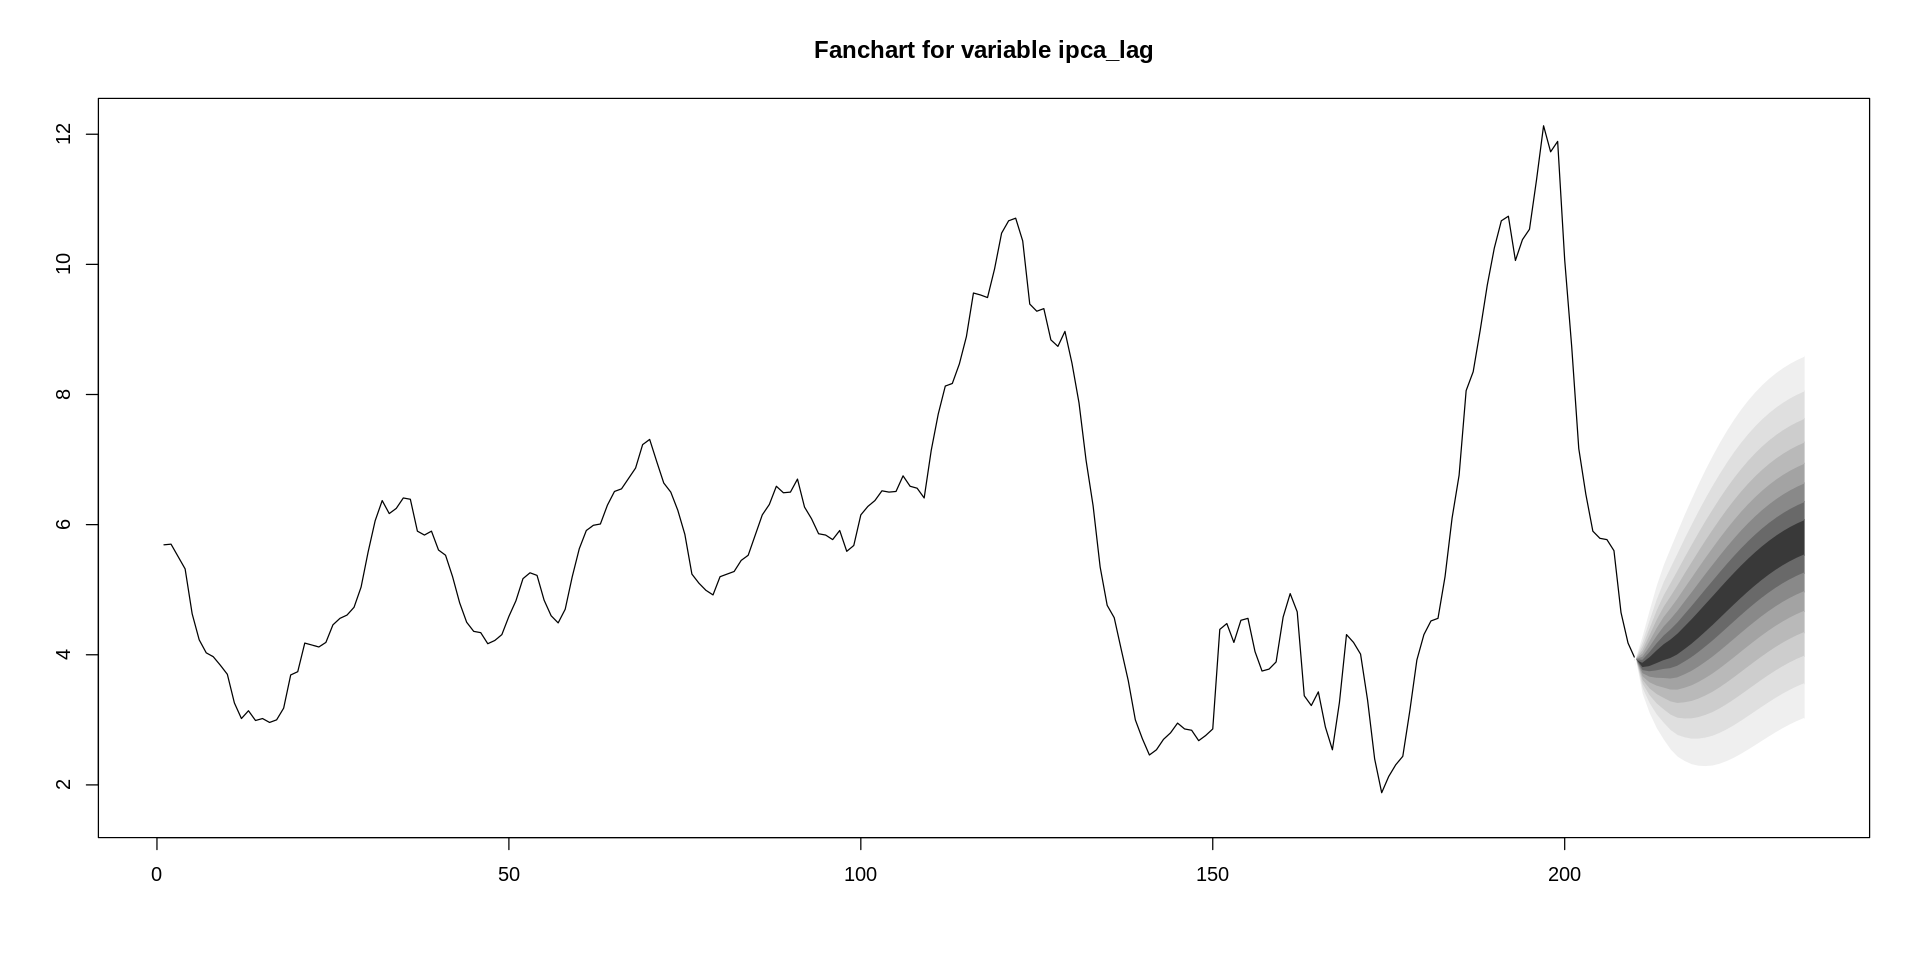

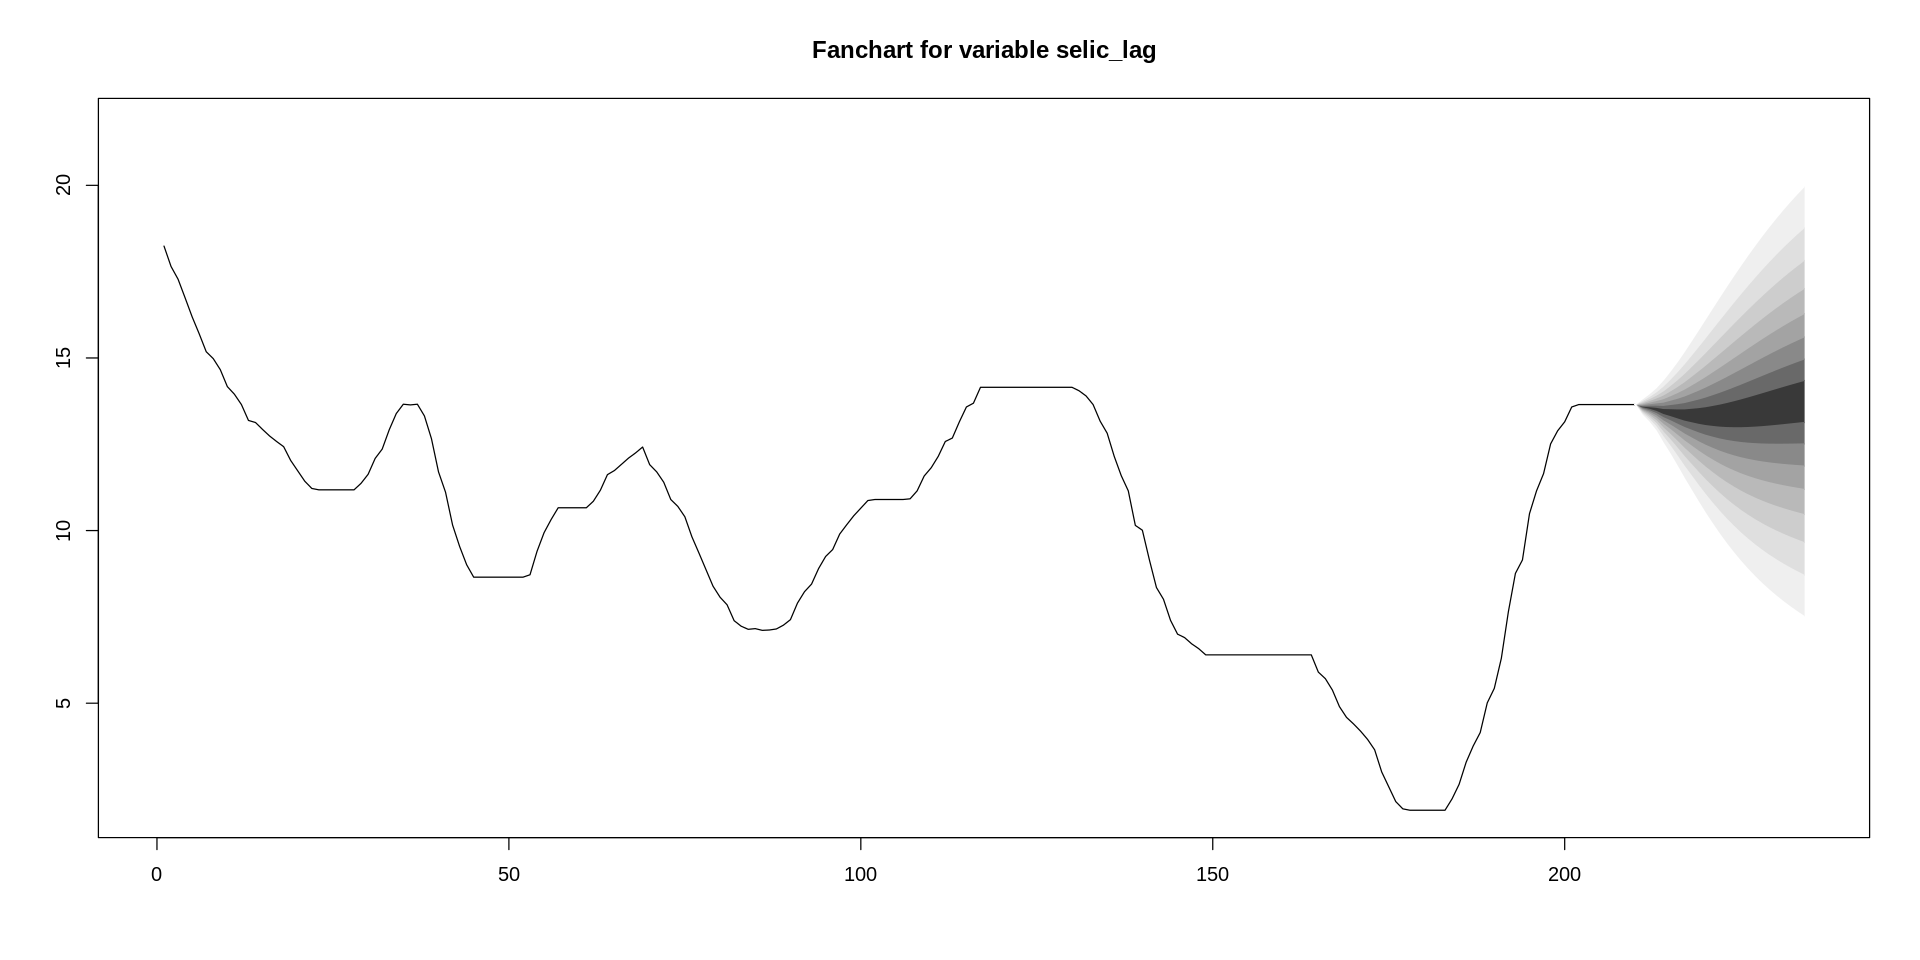

In [45]:
# Forecast using VECM
forecast_vecm <- predict(vecm_model_formatted, n.ahead = 24, ci = 0.95)

fanchart(forecast_vecm, names = "consumer_inflation_expectation")
fanchart(forecast_vecm, names = "ipca_lag")
fanchart(forecast_vecm, names = "selic_lag")